<a href="https://colab.research.google.com/github/JCCamelo/MVP1_PUC/blob/main/MVP1_An%C3%A1lise_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Definição do Problema

Uma grande varejista do mercado brasileiro, presente em todo o país, dispõe de um braço voltado somente para atendimento para empresas, possui um site estruturado e também dispõe de um atendimento personalizado, utilizado em sua grande maioria por grandes empresas, pois o processo de compra é mais complexo e precisa de um certo acompanhamento.

Dito isto, os dados apresentados neste projeto diz respeito a todas as negociações do ano de 2022 realizadas pela equipe comercial responsável pelo atendimento personalizado, neles não são inclusos os dados do site, somente o canal offline, com contado direto com o cliente.

Estas negociações chegam aos vendedores através de uma caixa de email, assim uma pessoa é responsável por entender inicialmente do que se trata e depois repassae a solicitação de orçamento para um responsável, ele então dará prosseguimento na negociação, realizando a venda ou não.

O intuito deste estudo é prever o ano de 2023 em vendas baseado nos dados de 2022, um problema de cunho de aprendizado supervisionado.

**Informações sobre os atributos:**

1.	**oportunidade** - Número da negociação que é criada no sistema
2.	**empresa** - Nome da empresa que está comprando
3.	**data_criacao** - Data de criação da negociação no sistema
4.	**data_envio_proposta** - Data do envio da proposta do vendedor para o cliente
5.	**data_fechada** - Data que a negociação foi encerrada
6.	**Data_ultima_modificação** - Data da última vez que a oportunidade foi alterada no sistema
7.	**valor** - Valor negociado da venda
8.	**fase_comercial** - Indica se a venda foi realizada ou não
9.	**nova_venda** - Número da negociação que é criada no sistema, parecido com a oportunidade
10.	**finalidade** - Indica se a venda é para uso próprio da empresa ou se ela irá revender os produtos
11.	**origem** - Por qual canal o orçamento chegou para a empresa
12.	**departamento** - Qual o departamento da venda (Telefonia, Eletrônicos e etc)
13.	**motivo_perdido** - Caso a venda seja perdida, qual o motivo da perda
14.	**tipo_venda** - Qual o tipo da venda
15.	**erp** - Indica qual a plataforma utilizada para responder o cliente, caso seja necessário o uso
16.	**pagamento** - Como que o cliente pagou a negociação
17.	**produto** - O nome do produto negociado
18.	**sku** - O número do código do produto negociado
19.	**quantidade** - Quantas unidades do produto negociado
20.	**vendedor** - O nome do vendedor


In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from datetime import datetime

In [2]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# 2. Carga de Dados

Carregando de um arquivo .csv do pacote Pandas (Python Data Analysis Library)

In [3]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset

url = "https://raw.githubusercontent.com/JCCamelo/analise_dados_mvp1/main/Base%20de%20dados%20MVP1%20-%20v7.csv"

# Informa o cabeçalho das colunas
colunas = ['oportunidade', 'empresa', 'data_criacao', 'data_envio_proposta', 
           'data_fechada', 'Data_ultima_modificação', 'valor', 'fase_comercial', 
           'nova_venda', 'finalidade', 'origem', 'departamento', 'motivo_perdido', 
           'tipo_venda', 'erp', 'pagamento', 'produto', 'sku', 'quantidade', 'vendedor']

# Lê o arquivo utilizando as colunas informadas
dataset = pd.read_csv(url, names=colunas, skiprows=1, delimiter=';')

Mostraremos as primeiras linhas do dataset para observar os valores. Percebemos que algumas colunas estão com valores zerados, como data_envio_proposta,	data_fechada, finalidade, origem, motivo_perdido, erp, pagamento, produto, sku e quantidade.

Precisaremos tratar estes dados na etapa de Pré-Processamento de dados.

In [4]:
dataset.head()

,oportunidade,empresa,data_criacao,data_envio_proposta,data_fechada,Data_ultima_modificação,valor,fase_comercial,nova_venda,finalidade,origem,departamento,motivo_perdido,tipo_venda,erp,pagamento,produto,sku,quantidade,vendedor
0,953092,Empresa 4,11/04/2022,NaN,NaN,04/05/2022,550.00,Congelada,NV - 0021549,NaN,NaN,UTILIDADES DOMESTICAS,NaN,Cotação,NaN,NaN,NaN,0,NaN,Vendedor B
1,941576,Empresa 11,16/03/2022,NaN,NaN,24/03/2022,31599.60,Congelada,NV - 0020532,Uso e consumo,NaN,ELETRONICOS (TVs),NaN,Cotação,NaN,Faturado,Descrição do produto Valor do produto Quantida...,1961678718,40.0,Vendedor E
2,941562,Empresa 12,16/03/2022,NaN,NaN,13/04/2022,3450.00,Congelada,NV - 0020529,Uso e consumo,NaN,LIVROS,NaN,Cotação,NaN,Faturado,NaN,0,NaN,Vendedor F
3,941563,Empresa 13,16/03/2022,NaN,NaN,22/09/2022,3600.00,Congelada,NV - 0020530,Uso e consumo,NaN,TELEFONIA,NaN,Cotação,NaN,Faturado,Smartphone Samsung Galaxy A12 64GB 4G Wi-Fi Te...,2655734451,3.0,Vendedor E
4,921989,Empresa 14,24/01/2022,NaN,NaN,08/02/2022,20399.94,Congelada,NV - 0018242,Uso e consumo,NaN,ELETRONICOS (TVs),NaN,Cotação,NaN,NaN,"Samsung Smart Tv 58"" Uhd 4k 58au7700, Processa...",3069544823,6.0,Vendedor B


# 3. Análise de Dados

**3.1. Estatísticas Descritivas**

Este comando mostra quantas linhas e colunas há neste dataset, desta forma são 10609 linhas com 20 colunas

In [5]:
# Mostra as dimensões do dataset
print(dataset.shape)

(10609, 20)


In [6]:
# Mostra as informações do dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10609 entries, 0 to 10608
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   oportunidade             10609 non-null  int64  
 1   empresa                  10594 non-null  object 
 2   data_criacao             10609 non-null  object 
 3   data_envio_proposta      9928 non-null   object 
 4   data_fechada             5366 non-null   object 
 5   Data_ultima_modificação  10609 non-null  object 
 6   valor                    10573 non-null  float64
 7   fase_comercial           10598 non-null  object 
 8   nova_venda               10609 non-null  object 
 9   finalidade               10490 non-null  object 
 10  origem                   4142 non-null   object 
 11  departamento             10609 non-null  object 
 12  motivo_perdido           4259 non-null   object 
 13  tipo_venda               10062 non-null  object 
 14  erp                   

Mostrando as primeiras e as últimas 10 linhas percebemos o dito anteriormente, algumas colunas estão com valores zerados, precisaremos tratar em um outro momento.

In [7]:
# Mostra as 10 últimas linhas do dataset
dataset.tail(10)

,oportunidade,empresa,data_criacao,data_envio_proposta,data_fechada,Data_ultima_modificação,valor,fase_comercial,nova_venda,finalidade,origem,departamento,motivo_perdido,tipo_venda,erp,pagamento,produto,sku,quantidade,vendedor
10599,983730,Empresa 2277,30/12/2022,30/12/2022,NaN,16/01/2023,2375.00,Fechada e Perdida,NV - 0030997,Uso e consumo,Caixa Off,TELEFONIA,Cliente - Desistência da compra,Cotação,NaN,Faturado,Smartphone Samsung Galaxy A53 5G 128GB Tela 6....,NaN,1.0,Vendedor T
10600,983719,Empresa 4,30/12/2022,30/12/2022,29/12/2022,30/12/2022,318.00,Fechada e Ganha,NV - 0030996,Uso e consumo,Caixa Off,PAPELARIA,NaN,Cotação,NaN,Faturado,Caixa Papel A4 Chamex,NaN,2.0,Vendedor C
10601,983718,Empresa 4,30/12/2022,30/12/2022,29/12/2022,30/12/2022,477.00,Fechada e Ganha,NV - 0030995,Uso e consumo,Caixa Off,PAPELARIA,NaN,Cotação,NaN,Faturado,Caixa Papel A4 Chamex,NaN,3.0,Vendedor C
10602,983710,Empresa 2051,30/12/2022,30/12/2022,NaN,18/01/2023,32990.00,Fechada e Perdida,NV - 0030992,Revenda,Caixa On,TELEFONIA,Cliente - Preço,Cotação,NaN,Boleto,"iPhone 11 Apple (64GB) Preto Tela 6,1"" 4G Câme...",NaN,10.0,Vendedor C
10603,983709,Empresa 5276,30/12/2022,30/12/2022,NaN,18/01/2023,19990.00,Fechada e Perdida,NV - 0030991,Revenda,Caixa On,TELEFONIA,Cliente - Preço,Cotação,NaN,Boleto,Smartphone Moto G82 128GB 5G Wi-Fi Tela 6.6' D...,NaN,10.0,Vendedor C
10604,983708,Empresa 5277,30/12/2022,30/12/2022,NaN,18/01/2023,18699.89,Fechada e Perdida,NV - 0030990,Revenda,Caixa On,ELETRONICOS (TVs),Cliente - Desistência da compra,Cotação,NaN,Boleto,"Smart TV Philco 43"" Full HD 4K PTV43G70R2CSGBL...",NaN,11.0,Vendedor C
10605,983711,Empresa 2507,30/12/2022,30/12/2022,NaN,18/01/2023,38990.00,Fechada e Perdida,NV - 0030993,Revenda,Caixa On,TELEFONIA,Cliente - Preço,Cotação,NaN,Boleto,"iPhone 11 Apple (128GB) Branco tela 6,1"" Câmer...",NaN,10.0,Vendedor C
10606,983566,Empresa 3211,29/12/2022,02/01/2023,05/01/2023,05/01/2023,4500.00,Fechada e Ganha,NV - 0030977,Uso e consumo,Caixa Off,INFORMÁTICA E ACESSÓRIOS,NaN,Cotação,NaN,Faturado,NaN,NaN,1.0,Vendedor L
10607,983355,Empresa 532,28/12/2022,02/01/2023,NaN,13/01/2023,4000.00,Fechada e Perdida,NV - 0030948,Uso e consumo,Caixa Off,TELEFONIA,Cliente - Desistência da compra,Cotação,NaN,Faturado,Galaxy A03 64GB 4GB RAM Processador Octa Core ...,NaN,4.0,Vendedor T
10608,981098,Empresa 5287,14/12/2022,03/01/2023,NaN,04/03/2023,40000.00,Negociação,NV - 0030581,Uso e consumo,NaN,ELETRODOMESTICOS,NaN,NaN,NaN,NaN,diversos,NaN,NaN,Vendedor C


In [8]:
# Mostra as 10 primeiras linhas do dataset
dataset.head(10)

,oportunidade,empresa,data_criacao,data_envio_proposta,data_fechada,Data_ultima_modificação,valor,fase_comercial,nova_venda,finalidade,origem,departamento,motivo_perdido,tipo_venda,erp,pagamento,produto,sku,quantidade,vendedor
0,953092,Empresa 4,11/04/2022,NaN,NaN,04/05/2022,550.00,Congelada,NV - 0021549,NaN,NaN,UTILIDADES DOMESTICAS,NaN,Cotação,NaN,NaN,NaN,0,NaN,Vendedor B
1,941576,Empresa 11,16/03/2022,NaN,NaN,24/03/2022,31599.60,Congelada,NV - 0020532,Uso e consumo,NaN,ELETRONICOS (TVs),NaN,Cotação,NaN,Faturado,Descrição do produto Valor do produto Quantida...,1961678718,40.0,Vendedor E
2,941562,Empresa 12,16/03/2022,NaN,NaN,13/04/2022,3450.00,Congelada,NV - 0020529,Uso e consumo,NaN,LIVROS,NaN,Cotação,NaN,Faturado,NaN,0,NaN,Vendedor F
3,941563,Empresa 13,16/03/2022,NaN,NaN,22/09/2022,3600.00,Congelada,NV - 0020530,Uso e consumo,NaN,TELEFONIA,NaN,Cotação,NaN,Faturado,Smartphone Samsung Galaxy A12 64GB 4G Wi-Fi Te...,2655734451,3.0,Vendedor E
4,921989,Empresa 14,24/01/2022,NaN,NaN,08/02/2022,20399.94,Congelada,NV - 0018242,Uso e consumo,NaN,ELETRONICOS (TVs),NaN,Cotação,NaN,NaN,"Samsung Smart Tv 58"" Uhd 4k 58au7700, Processa...",3069544823,6.0,Vendedor B
5,941783,Empresa 16,16/03/2022,NaN,NaN,24/03/2022,20042.00,Congelada,NV - 0020556,Uso e consumo,NaN,INFORMÁTICA E ACESSÓRIOS,NaN,Cotação,NaN,NaN,Diversos,0,100.0,Vendedor E
6,950424,Empresa 20,04/04/2022,NaN,NaN,06/04/2022,44970.00,Congelada,NV - 0021308,Uso e consumo,NaN,TELEFONIA,NaN,Cotação,NaN,NaN,Smartphone Samsung Galaxy A32 128GB 4G Wi-Fi T...,2969966925,30.0,Vendedor B
7,947683,Empresa 21,28/03/2022,NaN,NaN,19/04/2022,32000.00,Congelada,NV - 0021035,Uso e consumo,NaN,TABLETS,NaN,Cotação,NaN,NaN,NaN,0,NaN,Vendedor E
8,938195,Empresa 22,08/03/2022,NaN,NaN,15/03/2022,96000.00,Congelada,NV - 0020248,Uso e consumo,NaN,PCS,NaN,Cotação,NaN,Boleto,Notebook Lenovo Ultrafino Ideapad 3 AMD Ryzen ...,4200685104,30.0,Vendedor E
9,950432,Empresa 24,04/04/2022,NaN,NaN,29/04/2022,11599.96,Congelada,NV - 0021312,Uso e consumo,NaN,ELETRONICOS (TVs),NaN,Cotação,NaN,NaN,NaN,0,NaN,Vendedor B


In [9]:
# Verifica o tipo de dataset de cada atributo
dataset.dtypes

oportunidade                 int64
empresa                     object
data_criacao                object
data_envio_proposta         object
data_fechada                object
Data_ultima_modificação     object
valor                      float64
fase_comercial              object
nova_venda                  object
finalidade                  object
origem                      object
departamento                object
motivo_perdido              object
tipo_venda                  object
erp                         object
pagamento                   object
produto                     object
sku                         object
quantidade                 float64
vendedor                    object
dtype: object

In [10]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
dataset.describe()

,oportunidade,valor,quantidade
count,10609.000000,1.057300e+04,9.223000e+03
mean,957460.042511,3.649294e+04,2.577700e+06
std,20289.186513,1.315728e+05,9.794346e+07
min,911123.000000,0.000000e+00,0.000000e+00
25%,940804.000000,2.184980e+03,1.000000e+00
50%,964668.000000,7.990000e+03,8.000000e+00
75%,974035.000000,2.590000e+04,2.300000e+01
max,983794.000000,5.145000e+06,4.501726e+09


**3.2. Visualizações Unimodais**

O histograma sem o tratamento de dados não nos diz informações claras, então teremos que voltar em outro momento depois do pré-processamento. Desta forma, iremos logo para essa etapa, com o objetivo de preparar melhor o dataset e tirar conclusões melhores.

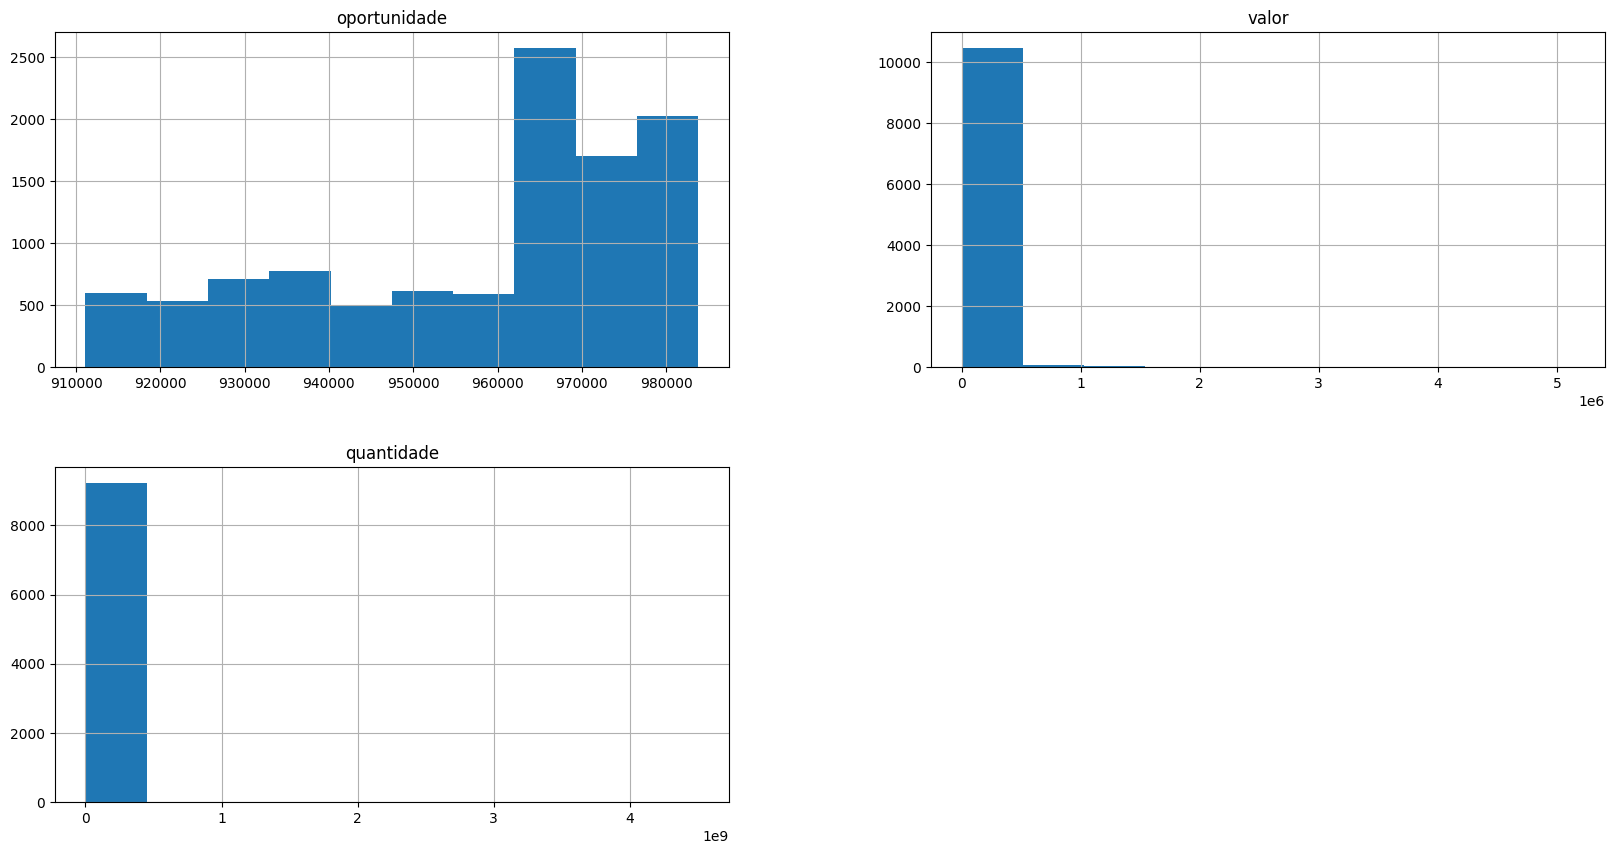

In [11]:
# Histograma
dataset.hist(figsize = (20,10))
plt.show()

# 4. Pré-Processamento de dados

**4.1. Criação de novas colunas**

Iremos formartar as colunas de data no dataset para o formato data/hora, assim teremos as informações corretas que elas representam.

Após isso, criaremos 2 colunas novas, uma para demonstrar o tempo de resposta que um vendedor tem, ou seja, quanto tempo ele demora para responder o cliente após receber a negociação. A outra será para mensurar o tempo que dura uma negociação, desde quando o cliente envia o orçamento até quando ela é encerrada.

In [12]:
# Converter as colunas "data_envio_proposta" e "data_criacao" para objetos de data/hora
dataset['data_envio_proposta'] = pd.to_datetime(dataset['data_envio_proposta'])
dataset['data_criacao'] = pd.to_datetime(dataset['data_criacao'])
dataset['data_fechada'] = pd.to_datetime(dataset['data_fechada'])
dataset['Data_ultima_modificação'] = pd.to_datetime(dataset['Data_ultima_modificação'])

# Subtrair as datas e armazenar os resultados em uma nova coluna chamada "dias_resposta"
dataset['dias_resposta'] = (dataset['data_envio_proposta'] - dataset['data_criacao'])

# Subtrair as datas e armazenar os resultados em uma nova coluna chamada "dias_negociacao"
dataset['dias_negociacao'] = (dataset['data_fechada'] - dataset['data_criacao'])

dataset.head()

,oportunidade,empresa,data_criacao,data_envio_proposta,data_fechada,Data_ultima_modificação,valor,fase_comercial,nova_venda,finalidade,...,motivo_perdido,tipo_venda,erp,pagamento,produto,sku,quantidade,vendedor,dias_resposta,dias_negociacao
0,953092,Empresa 4,2022-11-04,NaT,NaT,2022-04-05,550.00,Congelada,NV - 0021549,NaN,...,NaN,Cotação,NaN,NaN,NaN,0,NaN,Vendedor B,NaT,NaT
1,941576,Empresa 11,2022-03-16,NaT,NaT,2022-03-24,31599.60,Congelada,NV - 0020532,Uso e consumo,...,NaN,Cotação,NaN,Faturado,Descrição do produto Valor do produto Quantida...,1961678718,40.0,Vendedor E,NaT,NaT
2,941562,Empresa 12,2022-03-16,NaT,NaT,2022-04-13,3450.00,Congelada,NV - 0020529,Uso e consumo,...,NaN,Cotação,NaN,Faturado,NaN,0,NaN,Vendedor F,NaT,NaT
3,941563,Empresa 13,2022-03-16,NaT,NaT,2022-09-22,3600.00,Congelada,NV - 0020530,Uso e consumo,...,NaN,Cotação,NaN,Faturado,Smartphone Samsung Galaxy A12 64GB 4G Wi-Fi Te...,2655734451,3.0,Vendedor E,NaT,NaT
4,921989,Empresa 14,2022-01-24,NaT,NaT,2022-08-02,20399.94,Congelada,NV - 0018242,Uso e consumo,...,NaN,Cotação,NaN,NaN,"Samsung Smart Tv 58"" Uhd 4k 58au7700, Processa...",3069544823,6.0,Vendedor B,NaT,NaT


Neste trecho, criaremos uma coluna para nos mostrar os meses que a negociação se iniciou, assim como outra para nos informar o nome escrito do mês em questão.

In [13]:
dataset['mes_criacao'] = dataset['data_criacao'].dt.month

meses = {
    1: 'Janeiro',
    2: 'Fevereiro',
    3: 'Março',
    4: 'Abril',
    5: 'Maio',
    6: 'Junho',
    7: 'Julho',
    8: 'Agosto',
    9: 'Setembro',
    10: 'Outubro',
    11: 'Novembro',
    12: 'Dezembro'
}

dataset['mes_criacao_ext'] = dataset['mes_criacao'].apply(lambda x: meses[x])

dataset.head()

,oportunidade,empresa,data_criacao,data_envio_proposta,data_fechada,Data_ultima_modificação,valor,fase_comercial,nova_venda,finalidade,...,erp,pagamento,produto,sku,quantidade,vendedor,dias_resposta,dias_negociacao,mes_criacao,mes_criacao_ext
0,953092,Empresa 4,2022-11-04,NaT,NaT,2022-04-05,550.00,Congelada,NV - 0021549,NaN,...,NaN,NaN,NaN,0,NaN,Vendedor B,NaT,NaT,11,Novembro
1,941576,Empresa 11,2022-03-16,NaT,NaT,2022-03-24,31599.60,Congelada,NV - 0020532,Uso e consumo,...,NaN,Faturado,Descrição do produto Valor do produto Quantida...,1961678718,40.0,Vendedor E,NaT,NaT,3,Março
2,941562,Empresa 12,2022-03-16,NaT,NaT,2022-04-13,3450.00,Congelada,NV - 0020529,Uso e consumo,...,NaN,Faturado,NaN,0,NaN,Vendedor F,NaT,NaT,3,Março
3,941563,Empresa 13,2022-03-16,NaT,NaT,2022-09-22,3600.00,Congelada,NV - 0020530,Uso e consumo,...,NaN,Faturado,Smartphone Samsung Galaxy A12 64GB 4G Wi-Fi Te...,2655734451,3.0,Vendedor E,NaT,NaT,3,Março
4,921989,Empresa 14,2022-01-24,NaT,NaT,2022-08-02,20399.94,Congelada,NV - 0018242,Uso e consumo,...,NaN,NaN,"Samsung Smart Tv 58"" Uhd 4k 58au7700, Processa...",3069544823,6.0,Vendedor B,NaT,NaT,1,Janeiro


Nesta parte iremos dividir os valores em categorias, para ser mais fácil fazer análises onde os dados estão se concentrando mais, já que a maioria dos valores são diferentes.

In [14]:
condicoes = [    dataset['valor'] < 1001,
    (dataset['valor'] >= 1001) & (dataset['valor'] < 2001),
    (dataset['valor'] >= 2001) & (dataset['valor'] < 3001),
    (dataset['valor'] >= 3001) & (dataset['valor'] < 4001),
    (dataset['valor'] >= 4001) & (dataset['valor'] < 5001),
    (dataset['valor'] >= 5001) & (dataset['valor'] < 10001),
    (dataset['valor'] >= 10001) & (dataset['valor'] < 15001),
    (dataset['valor'] >= 15001) & (dataset['valor'] < 20001),
    (dataset['valor'] >= 20001) & (dataset['valor'] < 50001),
    (dataset['valor'] >= 50001) & (dataset['valor'] < 100001),
    (dataset['valor'] >= 100001) & (dataset['valor'] < 2000001),
    (dataset['valor'] >= 200001) & (dataset['valor'] < 5000001),
    (dataset['valor'] >= 500001) & (dataset['valor'] < 10000001),
    dataset['valor'] >= 10000001,
]

#valores = ['1k', '2k', '3k', '4k', '5k', '10k', '15k', '20k', '50k', '100k', '200k', '500k', '1M', '+1M']

valores = [1000, 2000, 3000, 4000, 5000, 10000, 15000, 20000, 50000, 100000, 200000, 500000, 1000000, 1500000]

#valores = [1, 2, 3, 4, 5, 10, 15, 20, 50, 100, 200, 500, 1000, 1500]

#valores = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n']

dataset['valor_intervalos'] = np.select(condicoes, valores, default=np.nan)

dataset.head()

,oportunidade,empresa,data_criacao,data_envio_proposta,data_fechada,Data_ultima_modificação,valor,fase_comercial,nova_venda,finalidade,...,pagamento,produto,sku,quantidade,vendedor,dias_resposta,dias_negociacao,mes_criacao,mes_criacao_ext,valor_intervalos
0,953092,Empresa 4,2022-11-04,NaT,NaT,2022-04-05,550.00,Congelada,NV - 0021549,NaN,...,NaN,NaN,0,NaN,Vendedor B,NaT,NaT,11,Novembro,1000.0
1,941576,Empresa 11,2022-03-16,NaT,NaT,2022-03-24,31599.60,Congelada,NV - 0020532,Uso e consumo,...,Faturado,Descrição do produto Valor do produto Quantida...,1961678718,40.0,Vendedor E,NaT,NaT,3,Março,50000.0
2,941562,Empresa 12,2022-03-16,NaT,NaT,2022-04-13,3450.00,Congelada,NV - 0020529,Uso e consumo,...,Faturado,NaN,0,NaN,Vendedor F,NaT,NaT,3,Março,4000.0
3,941563,Empresa 13,2022-03-16,NaT,NaT,2022-09-22,3600.00,Congelada,NV - 0020530,Uso e consumo,...,Faturado,Smartphone Samsung Galaxy A12 64GB 4G Wi-Fi Te...,2655734451,3.0,Vendedor E,NaT,NaT,3,Março,4000.0
4,921989,Empresa 14,2022-01-24,NaT,NaT,2022-08-02,20399.94,Congelada,NV - 0018242,Uso e consumo,...,NaN,"Samsung Smart Tv 58"" Uhd 4k 58au7700, Processa...",3069544823,6.0,Vendedor B,NaT,NaT,1,Janeiro,50000.0


**4.2. Tratamento de Missings e Limpeza**

Neste trecho identificamos um grande número de dados faltantes, as colunas que não possuem valores nulos são as já preenchidas automaticamente pelo sistema, todas as outras são os próprios vendedores que fazem o cadastro. Precisaremos fazer o tratamento delas.

In [15]:
# verificando nulls no dataset
dataset.isnull().sum()

oportunidade                  0
empresa                      15
data_criacao                  0
data_envio_proposta         681
data_fechada               5243
Data_ultima_modificação       0
valor                        36
fase_comercial               11
nova_venda                    0
finalidade                  119
origem                     6467
departamento                  0
motivo_perdido             6350
tipo_venda                  547
erp                        9918
pagamento                  2216
produto                     751
sku                        1513
quantidade                 1386
vendedor                      0
dias_resposta               681
dias_negociacao            5243
mes_criacao                   0
mes_criacao_ext               0
valor_intervalos             36
dtype: int64

<Axes: >

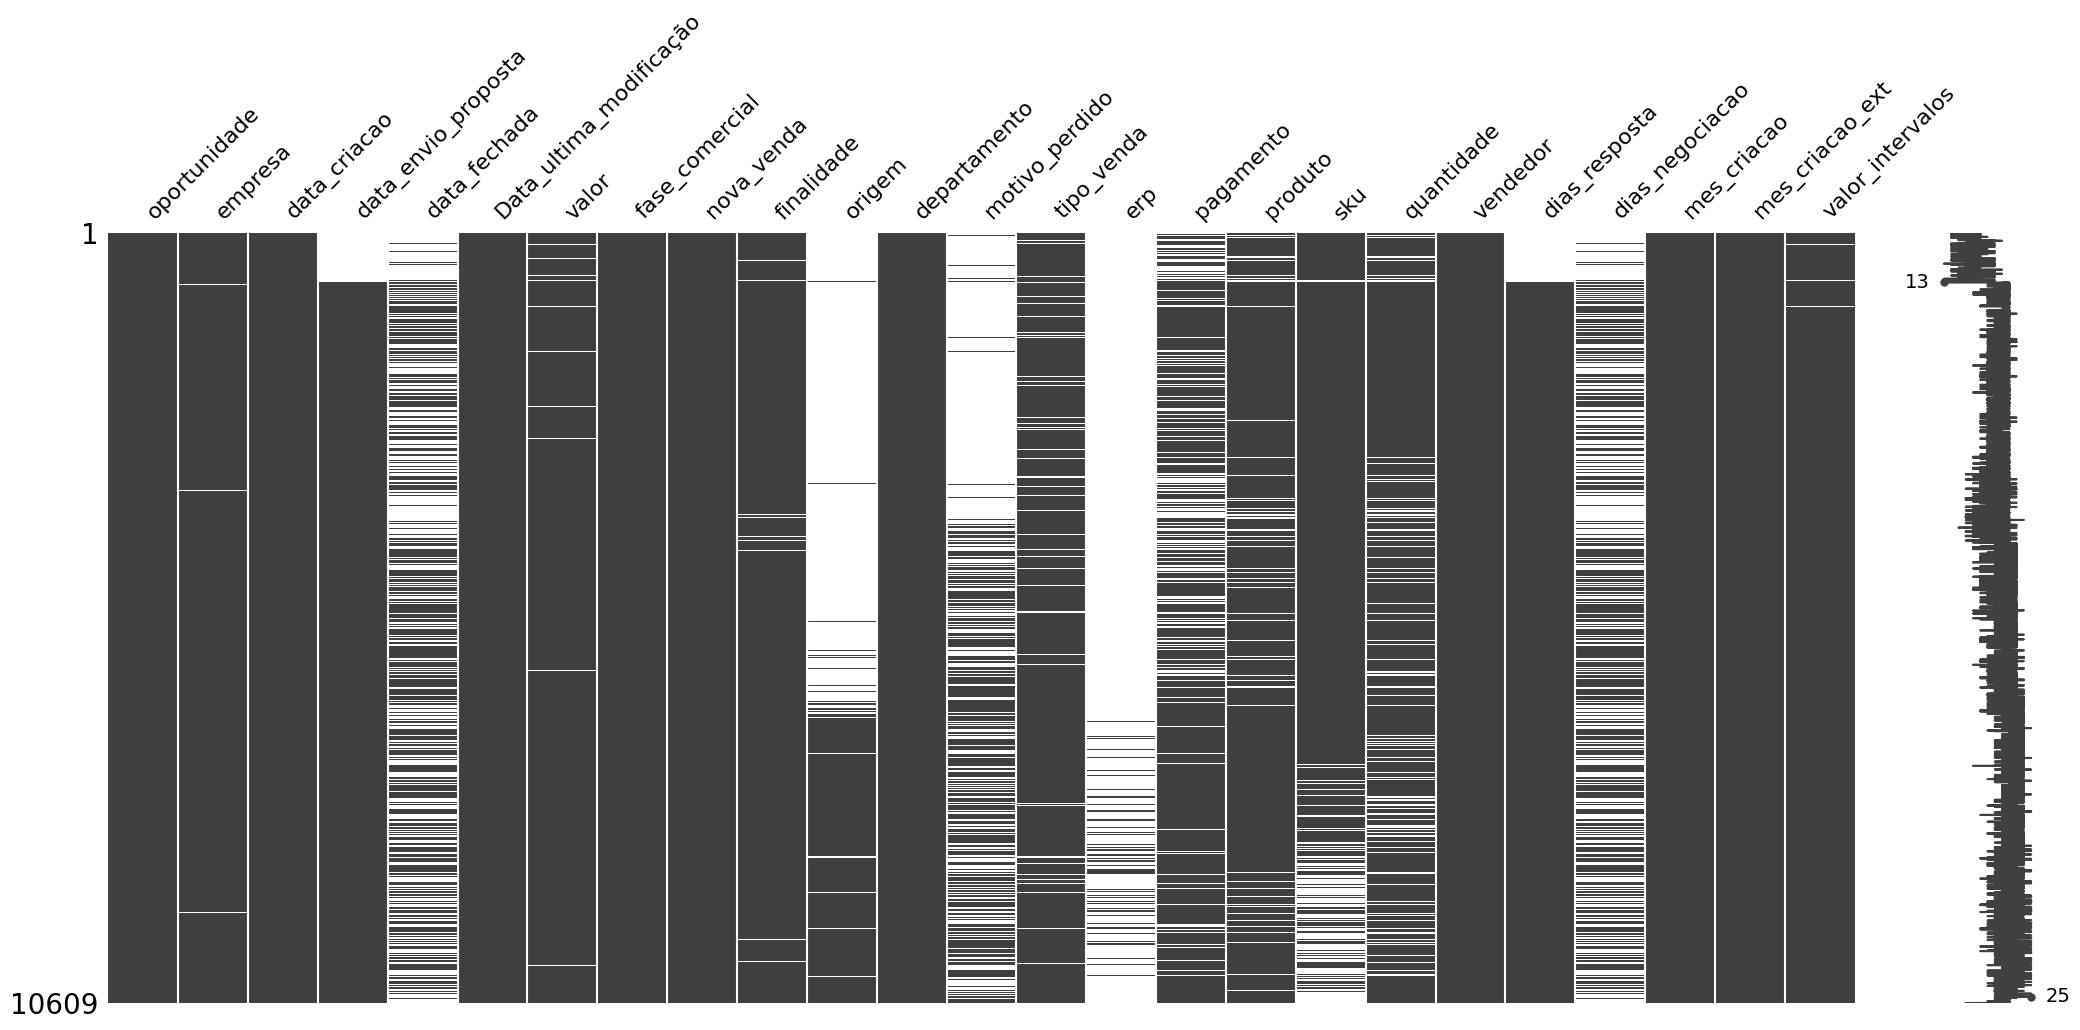

In [16]:
# salvando um NOVO dataset para tratamento de missings

# recuperando os nomes das colunas
col = list(dataset.columns)

# o novo dataset irá conter todas as colunas
atributos = dataset

# substituindo os zeros por NaN
atributos.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

<Axes: >

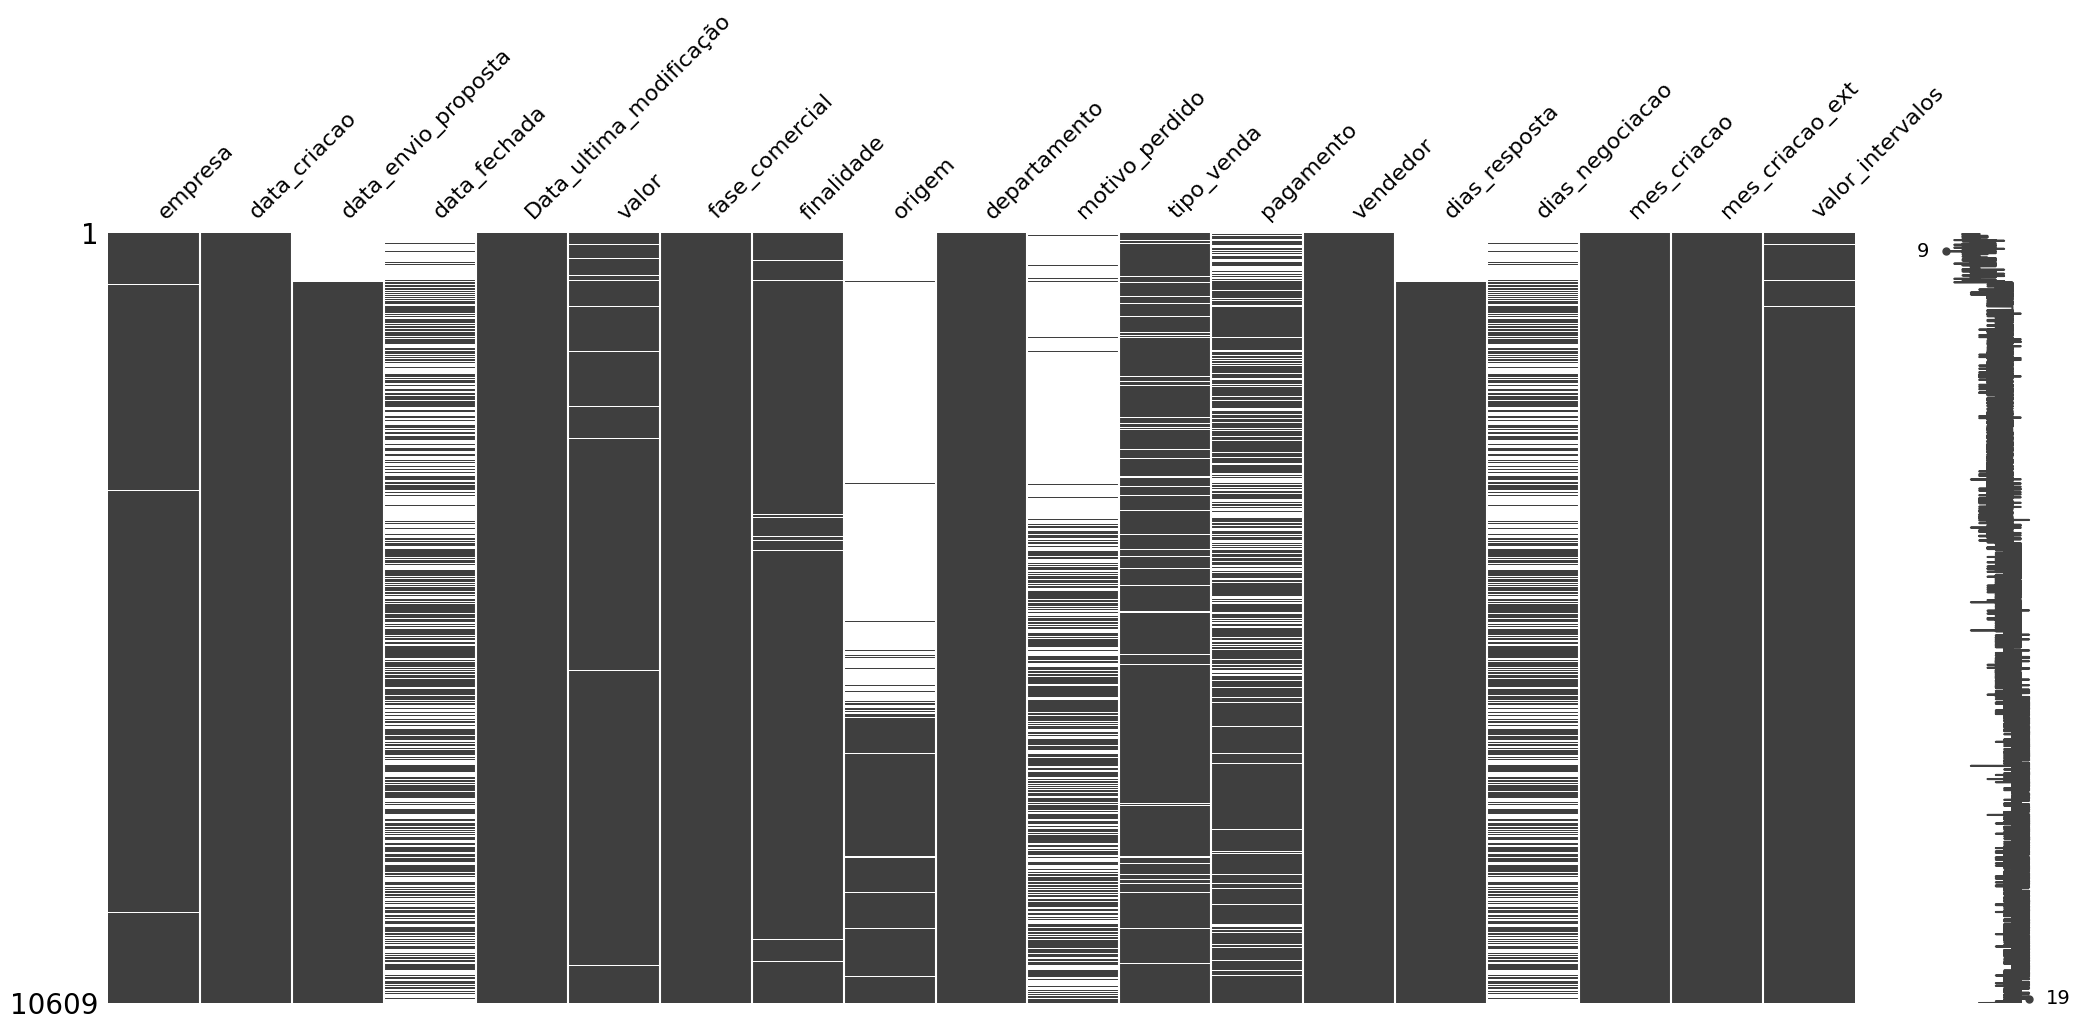

In [17]:
# removendo as colunas 'oportunidade', 'nova_venda', 'erp', 'quantidade' 'produto'
# e 'sku', já que não serão utilizadas nesta análise
atributos.drop(['oportunidade', 'nova_venda', 'erp', 'quantidade', 'produto', 'sku'],
               axis=1, inplace= True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

<Axes: >

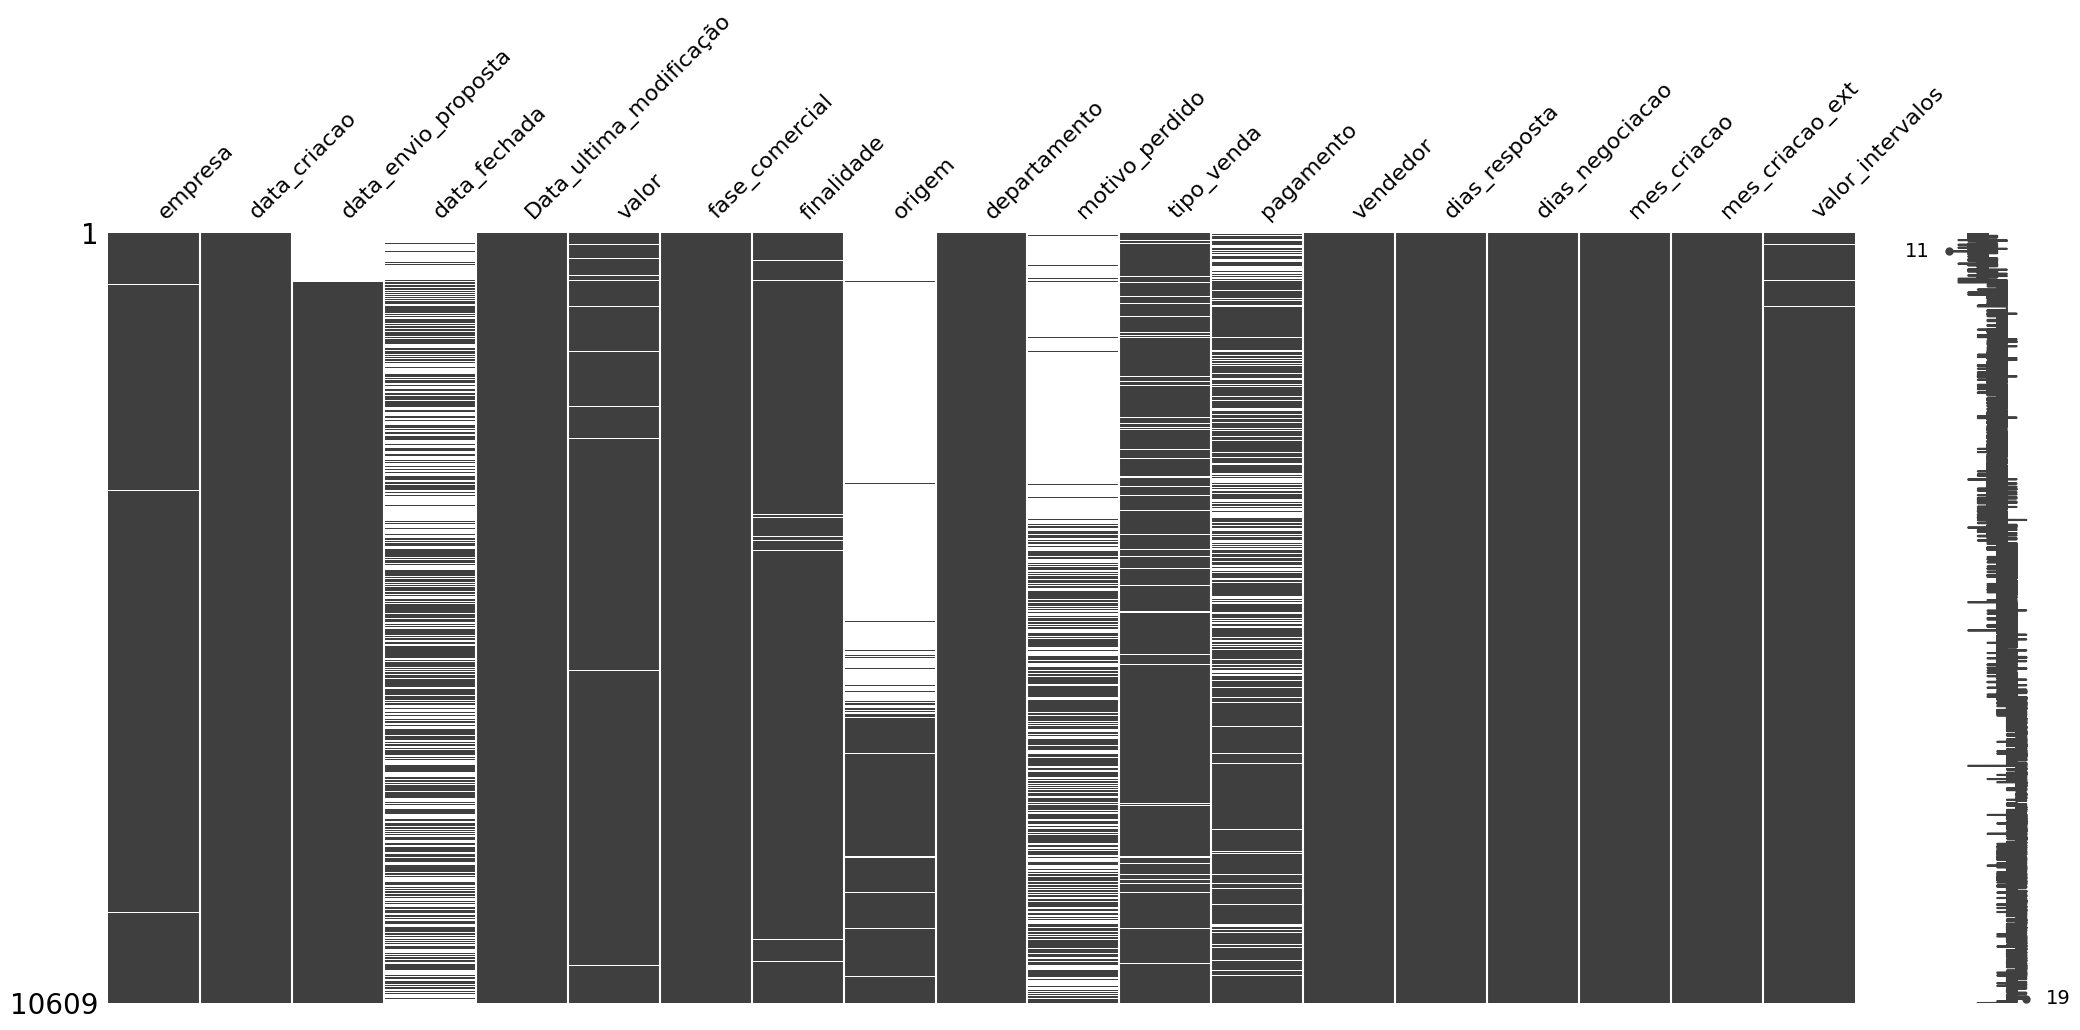

In [18]:
# Converter a coluna 'dias_resposta' para inteiros e substituir os NaN por 0
atributos['dias_resposta'] = atributos['dias_resposta'].dt.days.fillna(0).astype(int)

# Converter a coluna 'dias_negociacao' para inteiros e substituir os NaN por 0
atributos['dias_negociacao'] = atributos['dias_negociacao'].dt.days.fillna(0).astype(int)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

Trocaremos os valores nulos da coluna 'data_fechada' por valores de 'Data_ultima_modificação' pois assumimos que a última vez que um vendedor altera dados na oportunidade da venda, significa que ele fechou a negociação e não tem porque voltar nela.

Assumimos também que a 'data_envio_proposta' será igual a 'data_criacao' caso o valor da primeira seja nulo, pois assim que um vendedor cria a oportunidade, muito provavelmente ele irá enviar o orçamento no mesmo dia.

<Axes: >

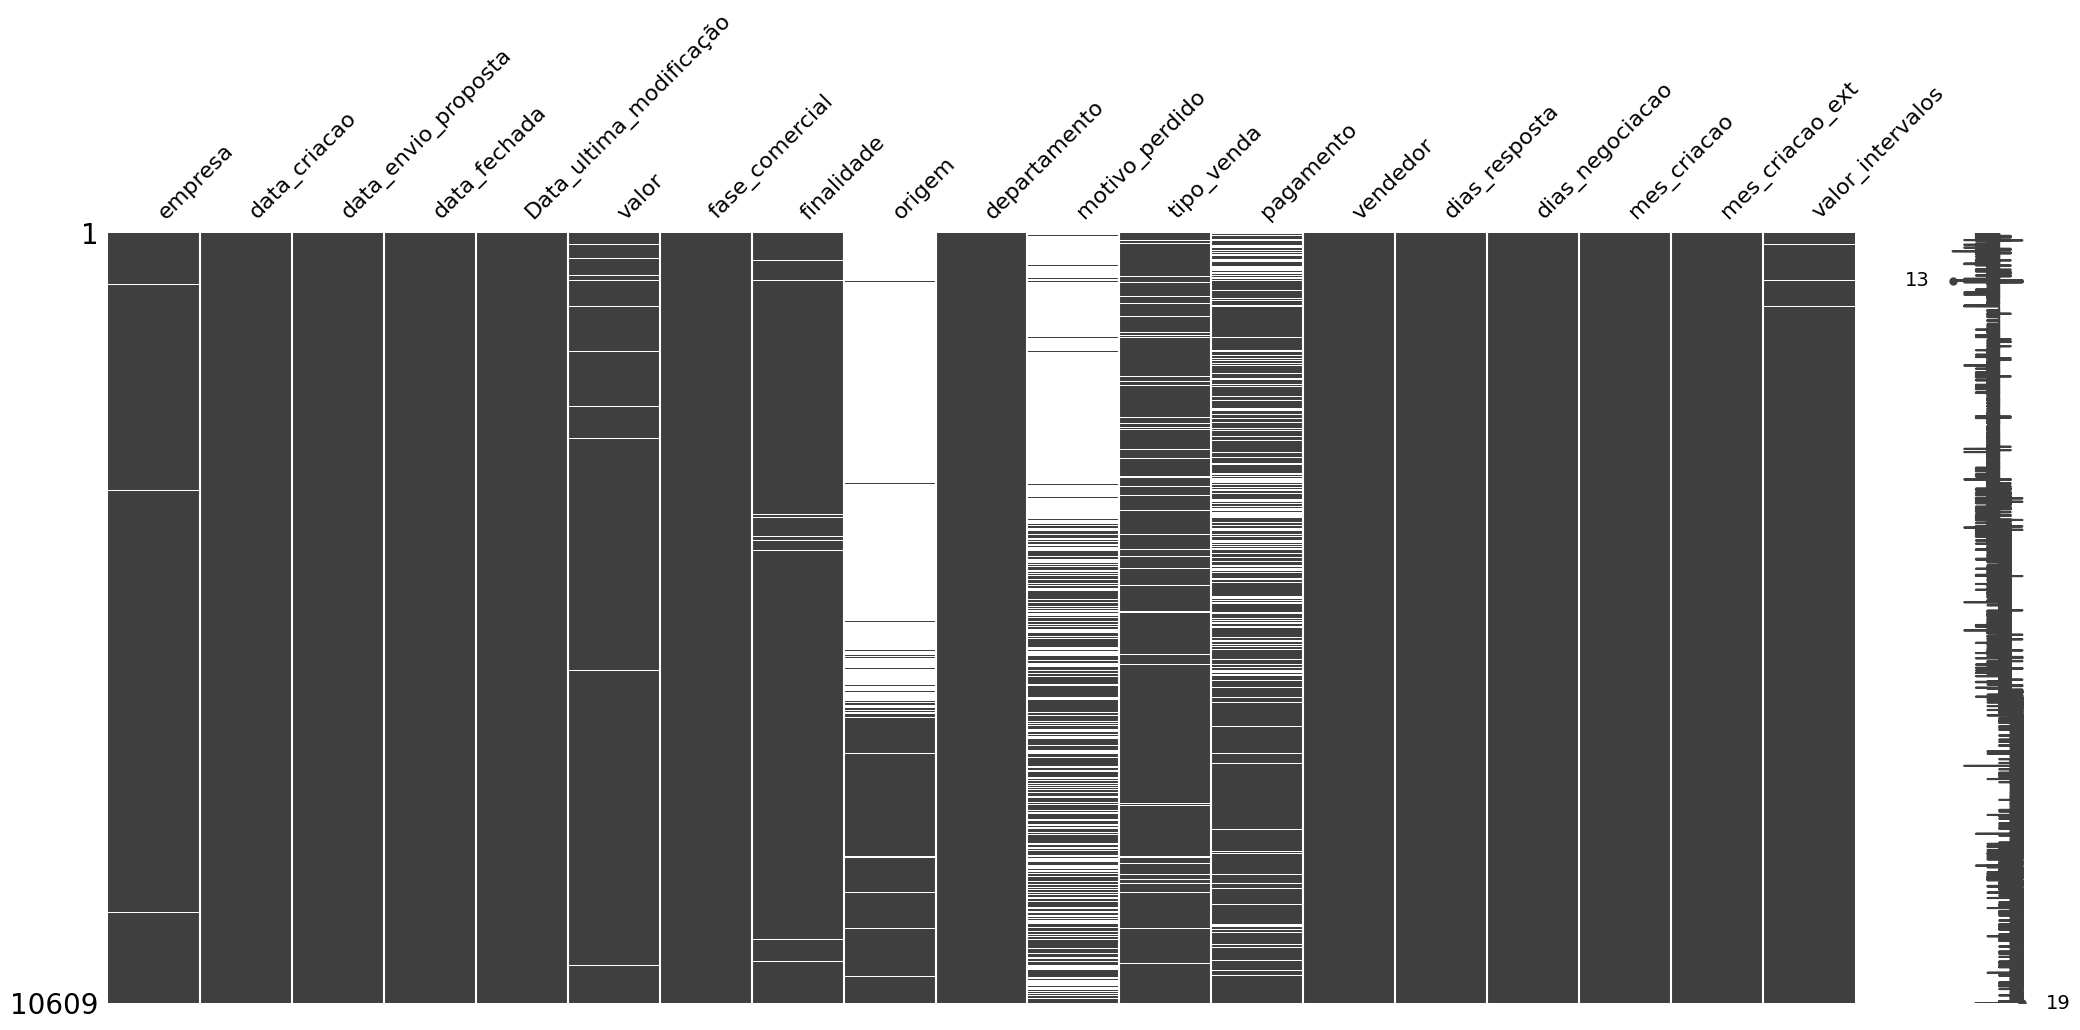

In [19]:
# substituindo os NaN de 'data_fechada' por valores de 'Data_ultima_modificação'
atributos['data_fechada'].fillna(atributos['Data_ultima_modificação'], inplace=True)

# substituindo os NaN de 'data_envio_proposta' por valores de 'data_criacao'
atributos['data_envio_proposta'].fillna(atributos['data_criacao'], inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

<Axes: >

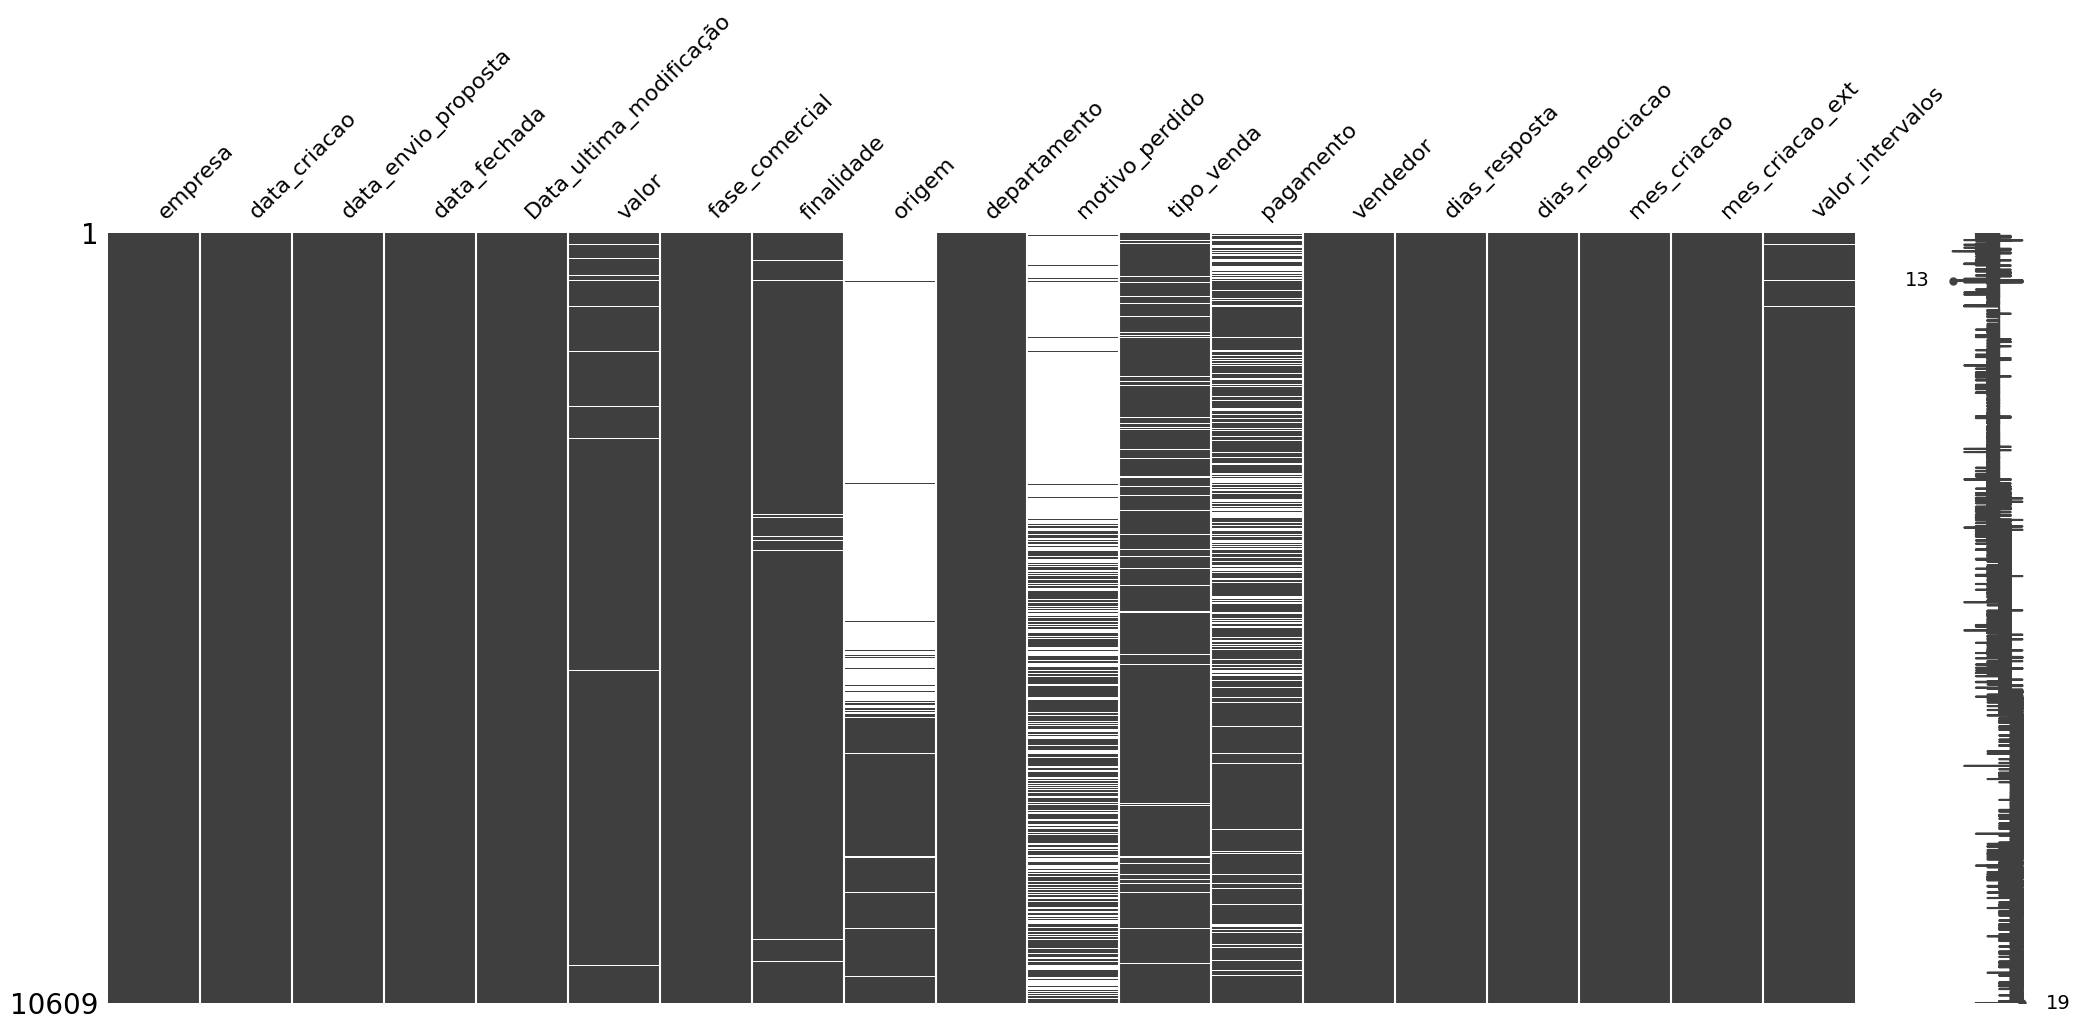

In [20]:
# Trocando todos os nomes de empresas nulos por 'Desconhecida'

atributos['empresa'].fillna('Desconhedida', inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

Apagamos todos as linhas que possuem os valores nulos, pois são negociações sem preço e não conseguimos saber quanto que foi cada venda ou cada perda.

<Axes: >

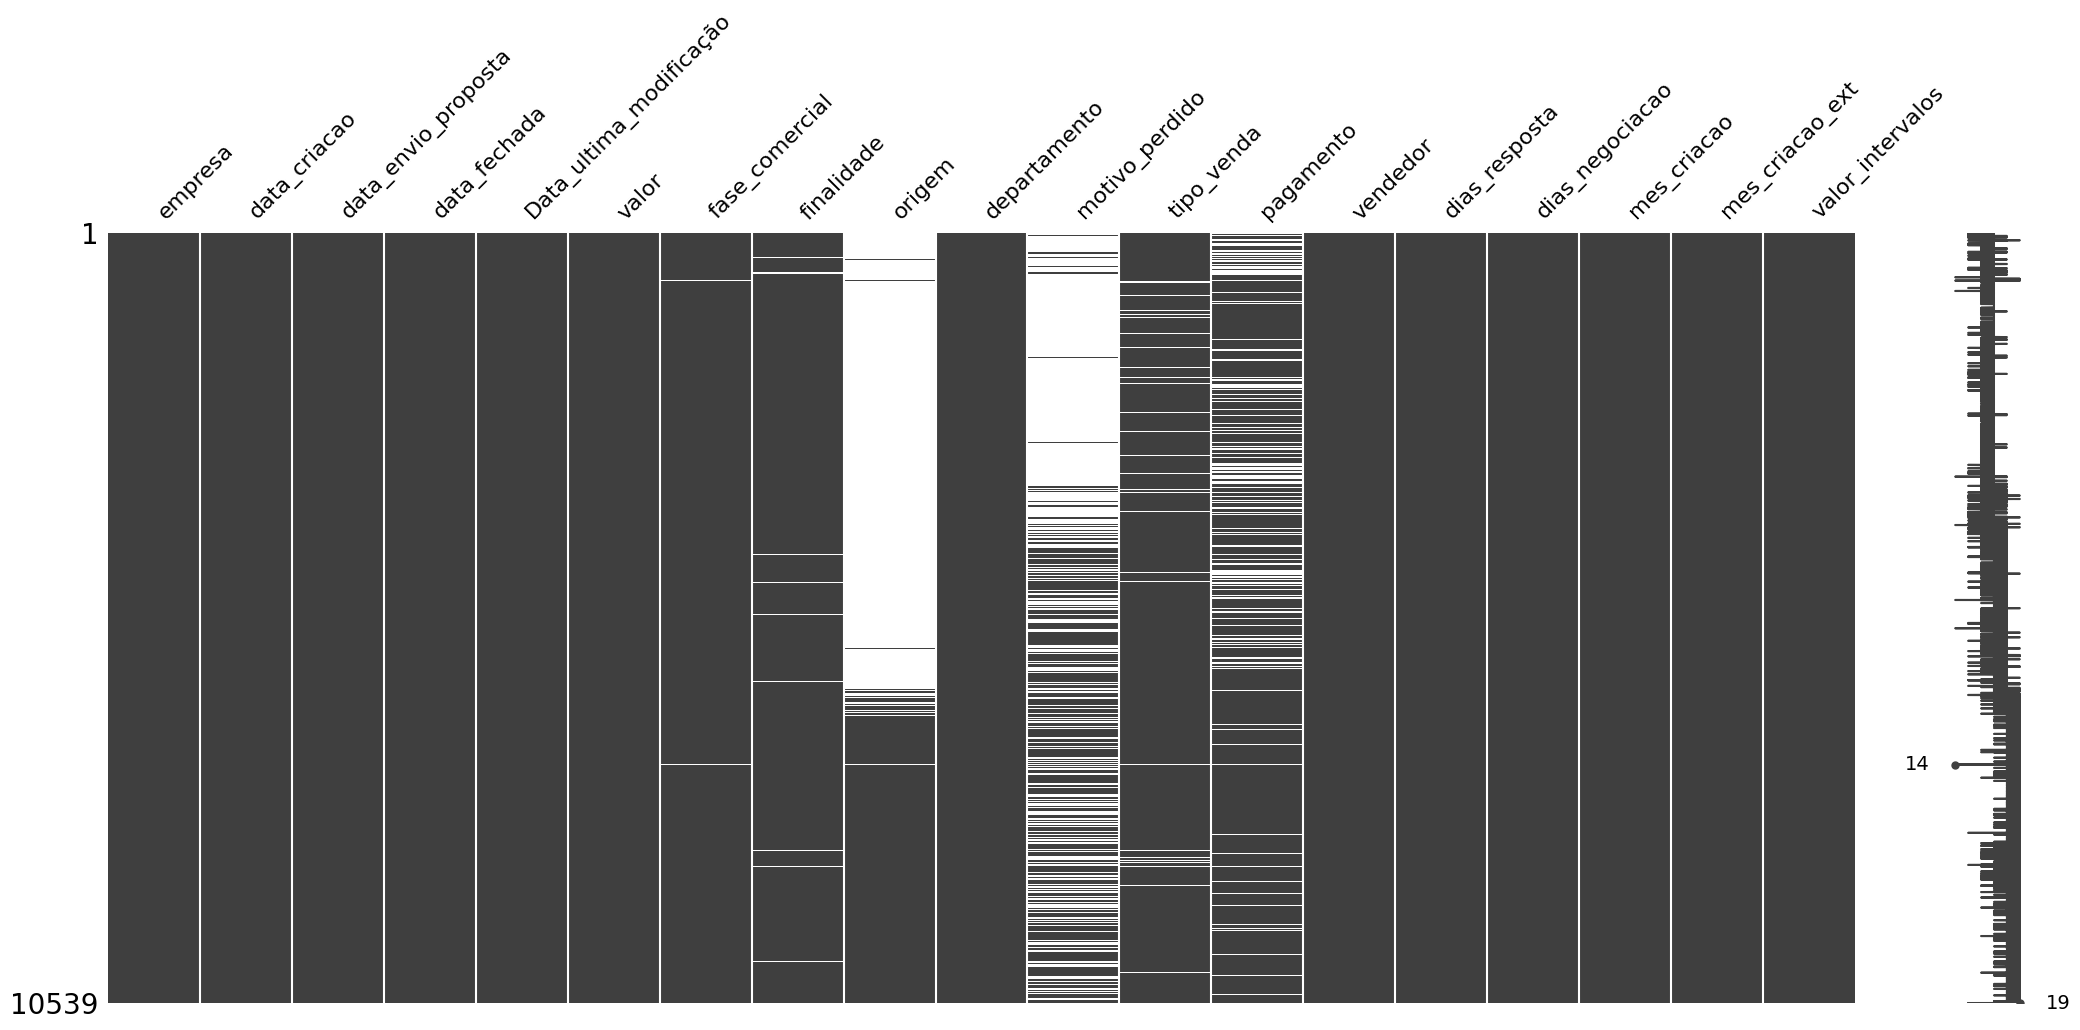

In [21]:
# apaga todas as linhas de valores nulos da coluna 'valor'
atributos.dropna(subset=['valor'], inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

Fazemos essa análise para ver todas as categorias da coluna 'fase_comercial'. Podemos identificar que há várias delas, porém só teria que existir 2, fechada e perdida para uma negociação perdida e fechada e ganha para uma venda ganha.

In [22]:
# seleciona a coluna 'fase_comercial'
coluna_fase_comercial = atributos['fase_comercial']

# conta a quantidade de ocorrências de cada categoria
categorias_fase_comercial = coluna_fase_comercial.value_counts()

# exibe as categorias encontradas
print(categorias_fase_comercial)

Fechada e Perdida       4410
Congelada               2611
Projeto em andamento    1894
Fechada e Ganha         1576
Cotando                   25
Proposta                   7
Negociação                 5
Name: fase_comercial, dtype: int64


Nestes códigos, transformamos a coluna 'fase_comercial' para ter somente as duas categorias necessárias para a análise, fechada e ganha e fechada e perdida.

Fechada e Perdida    7053
Fechada e Ganha      3470
Name: fase_comercial, dtype: int64


<Axes: >

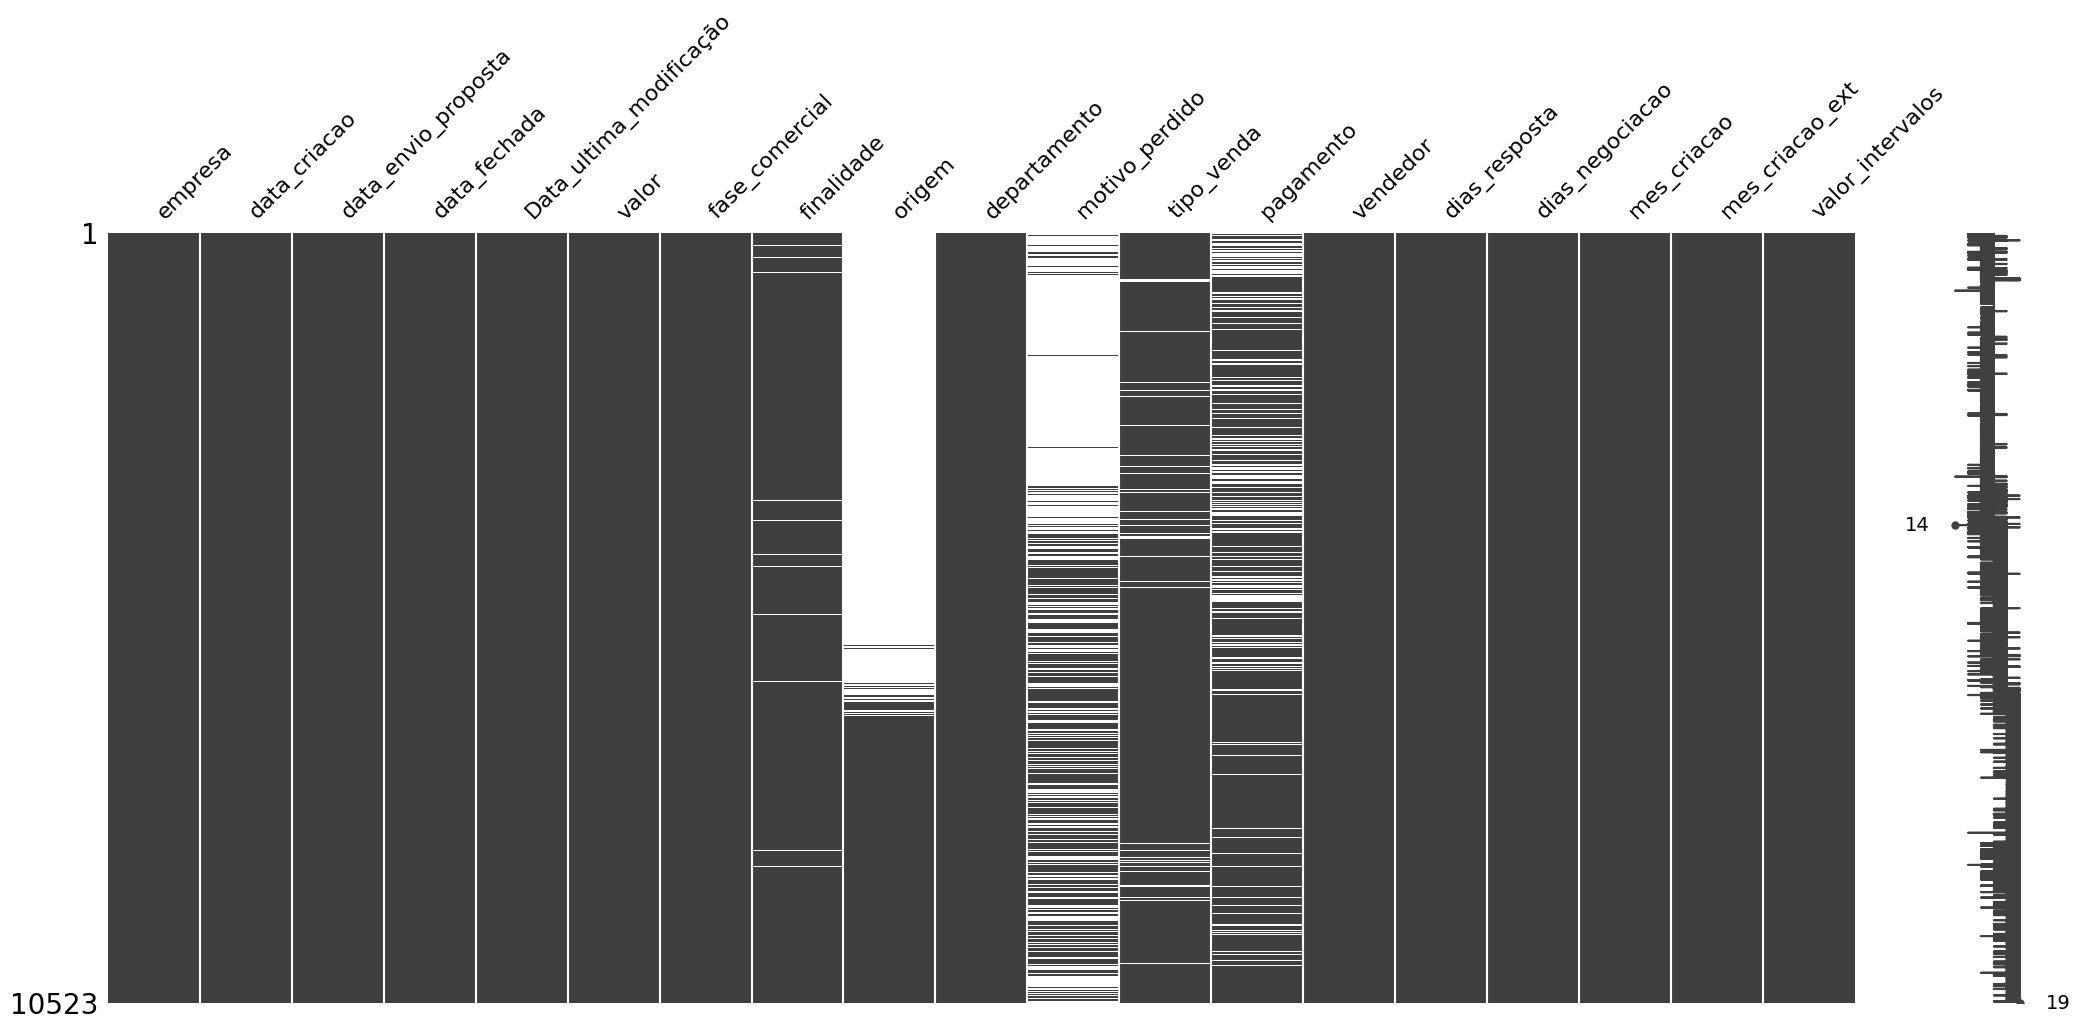

In [23]:
# substitui a categoria Congelada para Fechada e Perdida
atributos['fase_comercial'] = atributos['fase_comercial'].replace('Congelada', 'Fechada e Perdida')

# substitui a categoria Projeto em andamento para Fechada e Ganha
atributos['fase_comercial'] = atributos['fase_comercial'].replace('Projeto em andamento', 'Fechada e Ganha')

atributos['fase_comercial'] = atributos['fase_comercial'].replace('Projeto em Desenvolvimento', 'Fechada e Ganha')

atributos['fase_comercial'] = atributos['fase_comercial'].replace('Cotando', 'Fechada e Perdida')

atributos['fase_comercial'] = atributos['fase_comercial'].replace('Proposta', 'Fechada e Perdida')

# apagar as linhas com 'Apresentação' pois não é da equipe e sim de outro setor
atributos = atributos.drop(atributos[atributos['fase_comercial'] == 'Apresentação'].index)

# apagar as linhas com 'Negociação' pois não é da equipe e sim de outro setor
atributos = atributos.drop(atributos[atributos['fase_comercial'] == 'Negociação'].index)

atributos.dropna(subset=['fase_comercial'], inplace=True)

# seleciona a coluna desejada
coluna_fase_comercial = atributos['fase_comercial']

# conta a quantidade de ocorrências de cada categoria
categorias_fase_comercial = coluna_fase_comercial.value_counts()

# exibe as categorias encontradas
print(categorias_fase_comercial)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

Trocamos os valores nulos da coluna finalidade para uso e consumo pois a maioria dos clientes compram para uso próprio, por isso alguns vendedores deixavam essa categoria em branco, se atentando somente em cadastrar as vendas para revenda.

<Axes: >

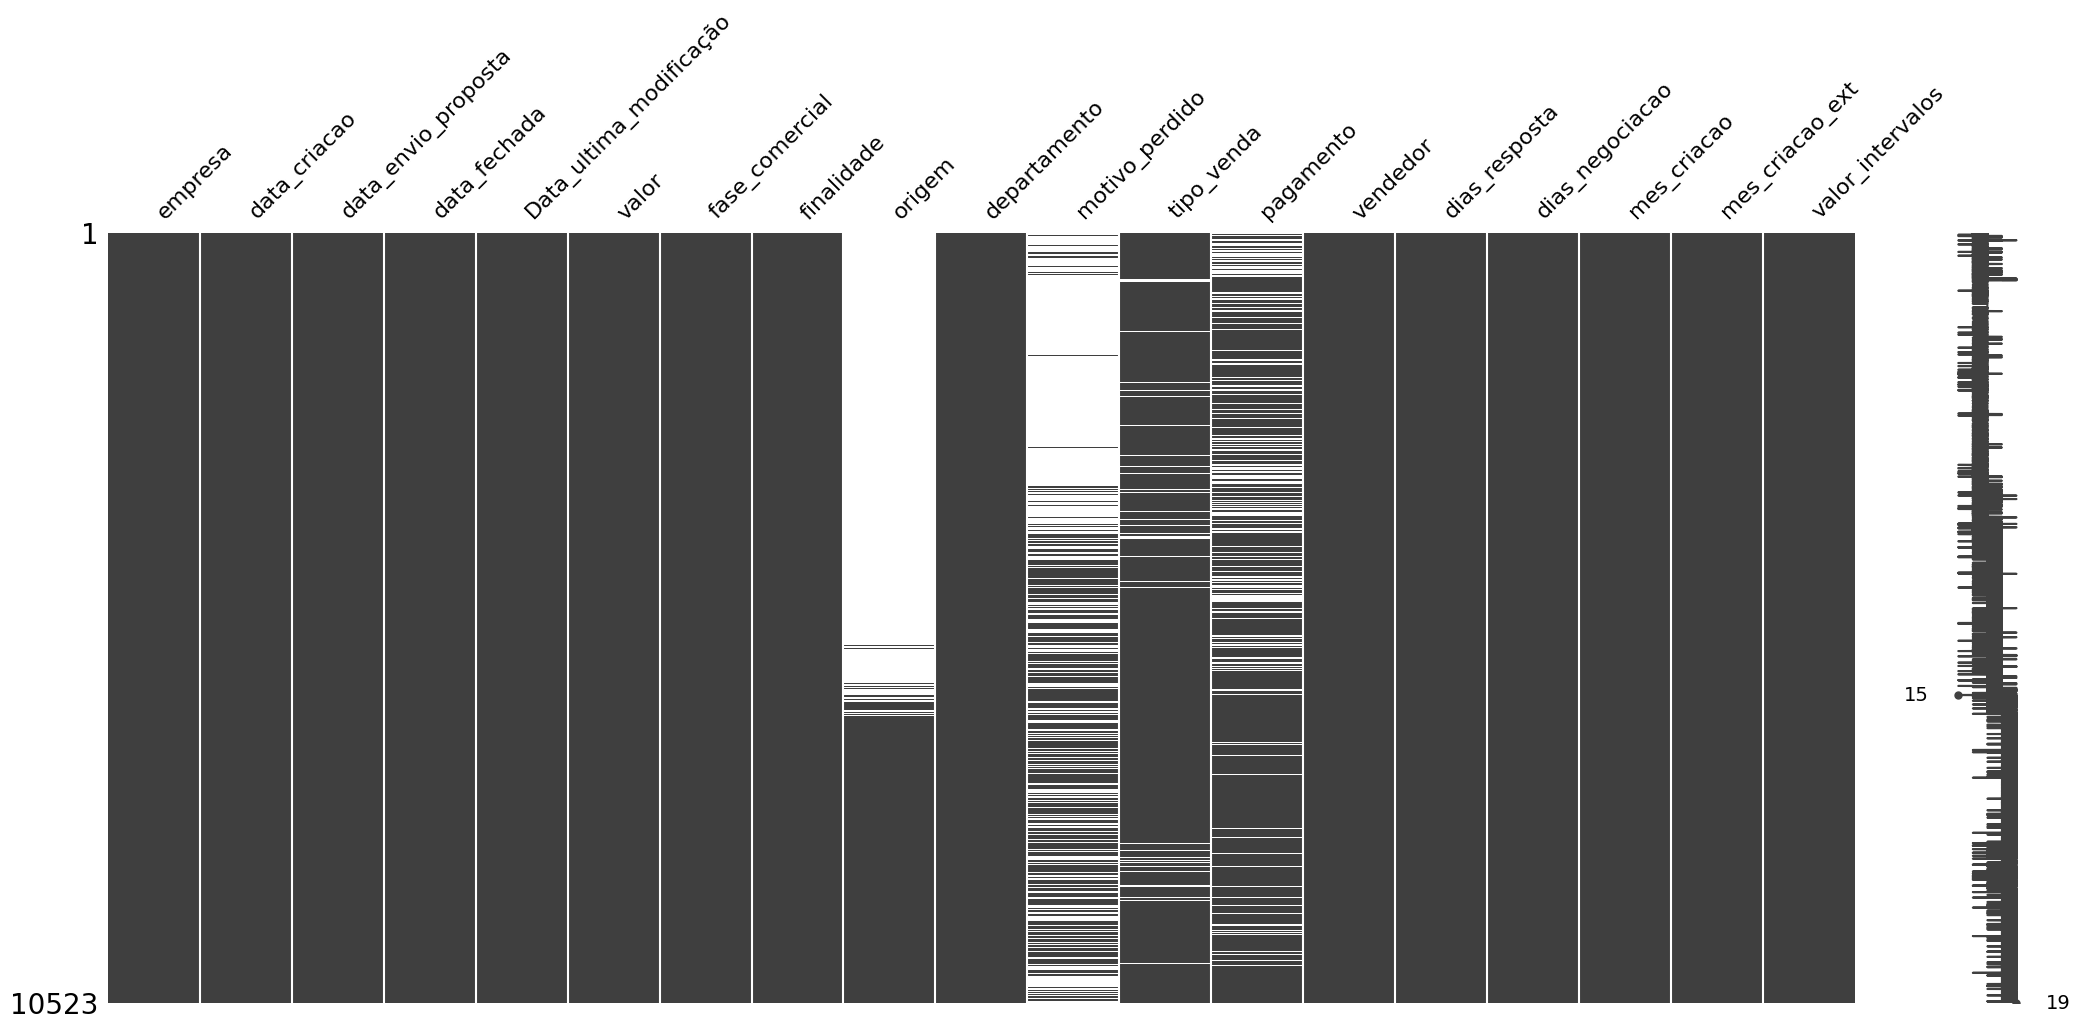

In [24]:
# Trocando toda a coluna 'finalidade' com dados nulos por 'Uso e consumo'

atributos['finalidade'].fillna('Uso e consumo', inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

O mesmo acontece nesta coluna, a maior parte das negociações chegam pelo canal Caixa Off, assim passaremos os valores nulos para a categoria em questão.

<Axes: >

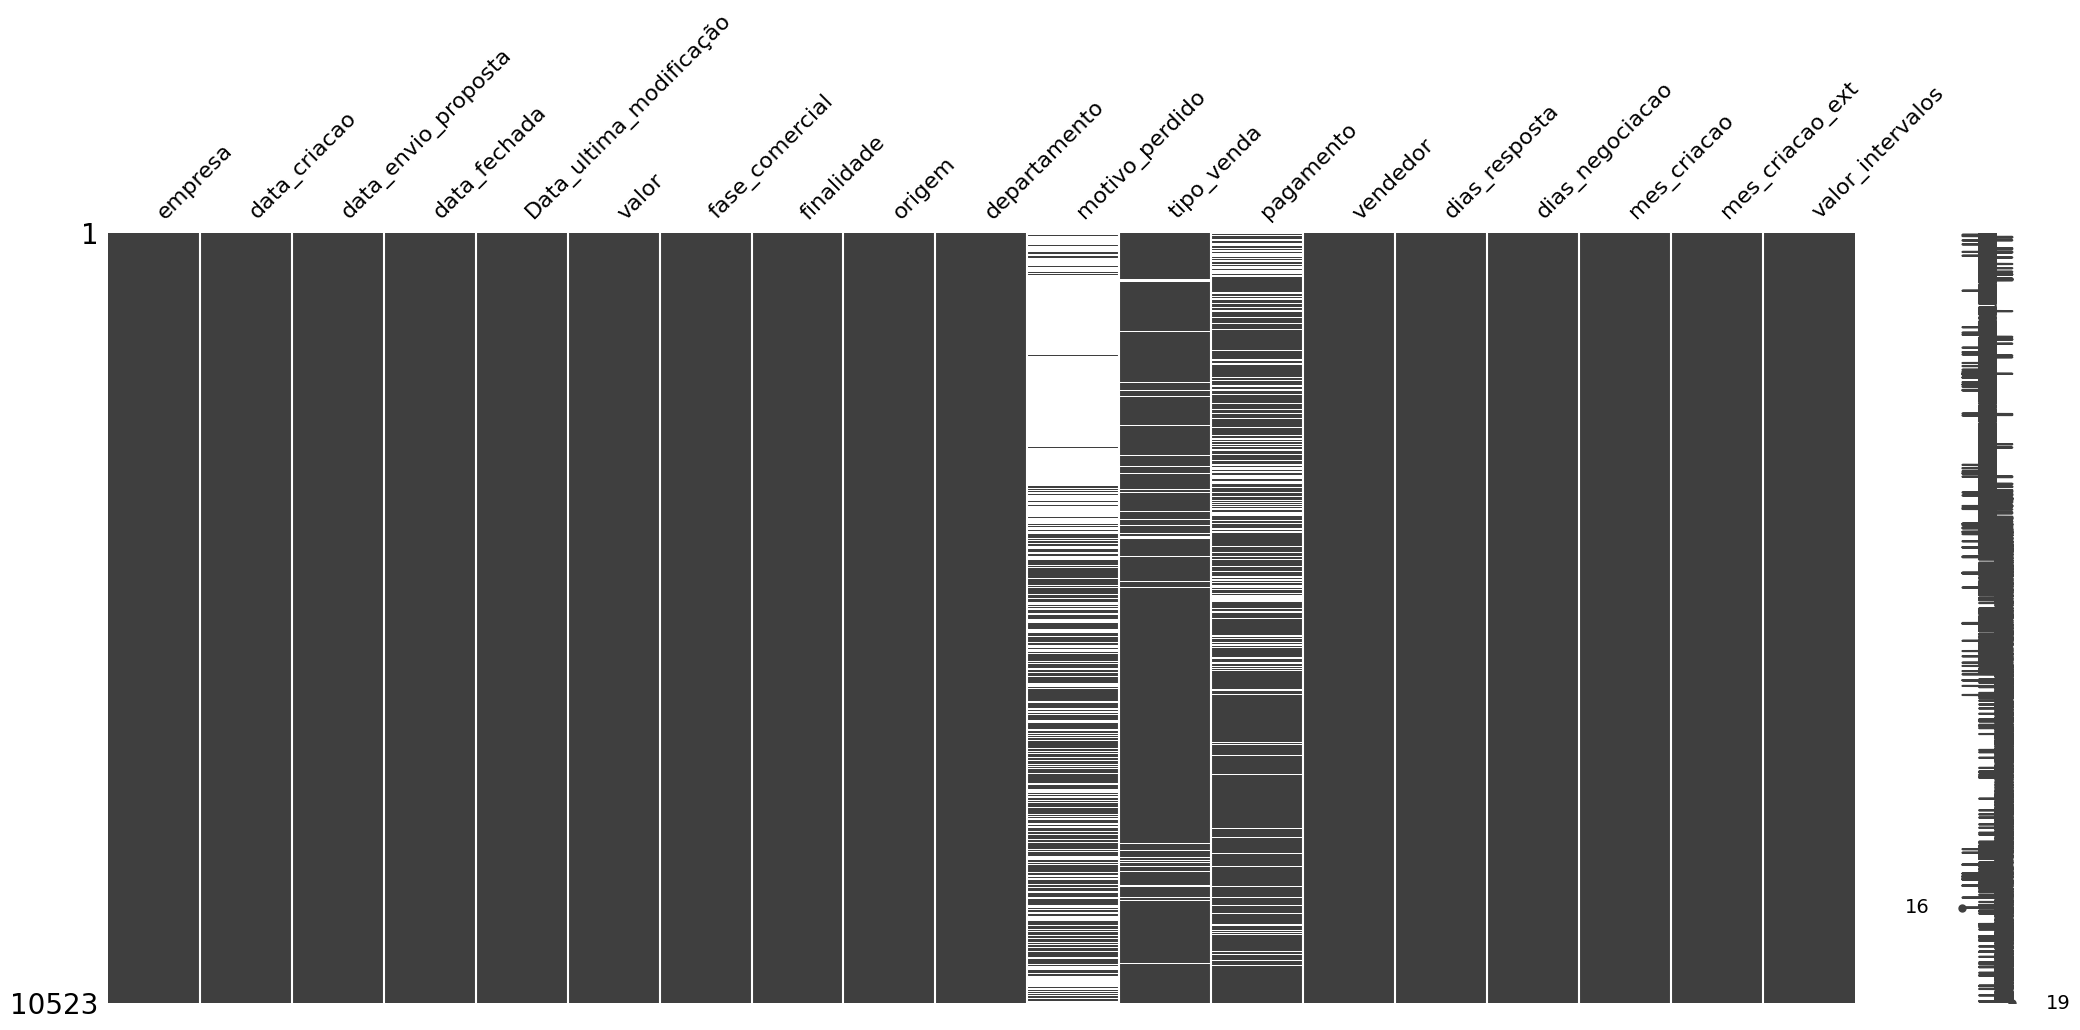

In [25]:
# Trocando toda a coluna 'origem' com dados nulos por 'Caixa Off'

atributos['origem'].fillna('Caixa Off', inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

Neste caso criaremos uma nova categoria, chamada 'desconhecido' para os dados de departamento nulos, não conseguimos saber de qual são.

<Axes: >

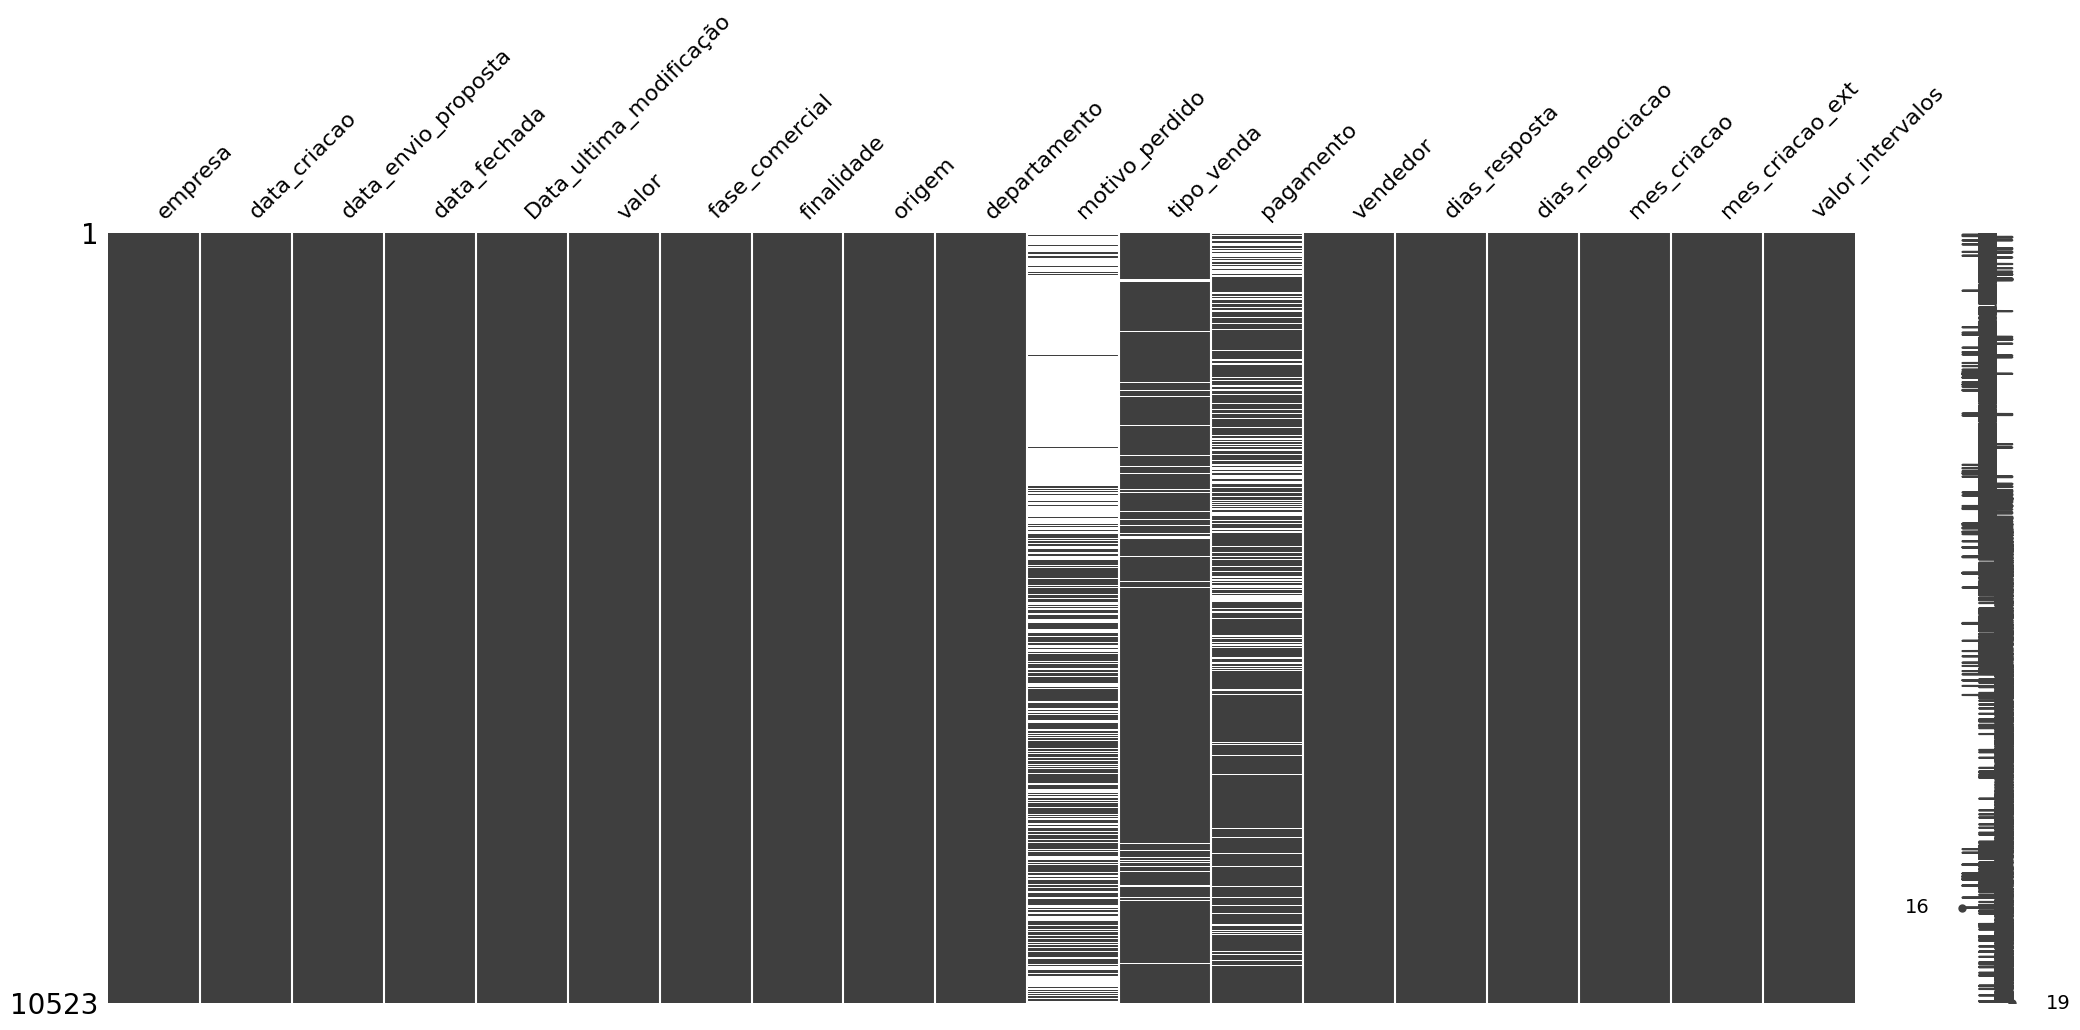

In [26]:
# Trocando todos os nomes de departamentos nulos por 'Desconhecido'

atributos['departamento'].fillna('Desconhedido', inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

Fazemos essa troca por ser o motivo padrão de perda de negociação para os vendedores

<Axes: >

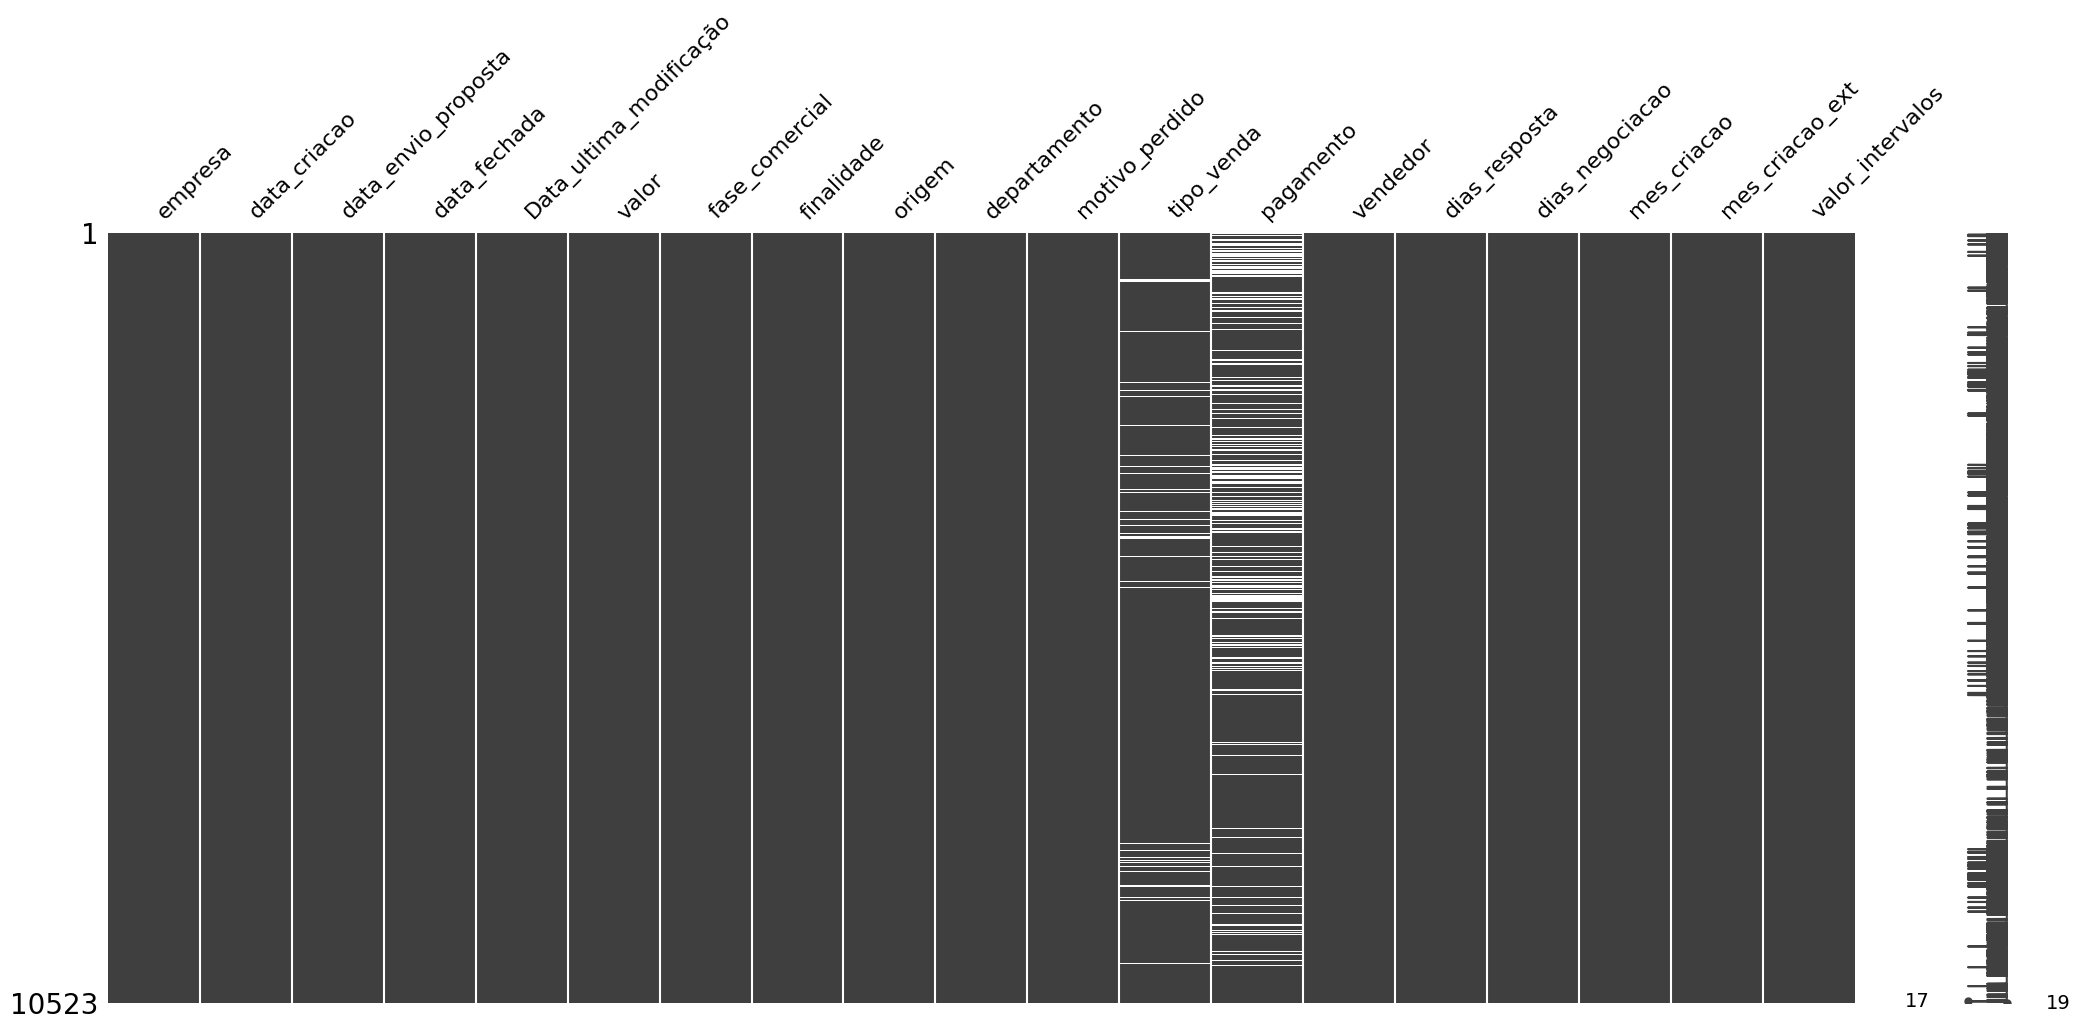

In [27]:
# Trocando os dados nulos da coluna 'motivo perdido' para 'Cliente - Desistência da compra'

atributos['motivo_perdido'].fillna('Cliente - Desistência da compra', inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

Fazemos essa troca por ser o pagamento padrão dos clientes da empresa estudada.

<Axes: >

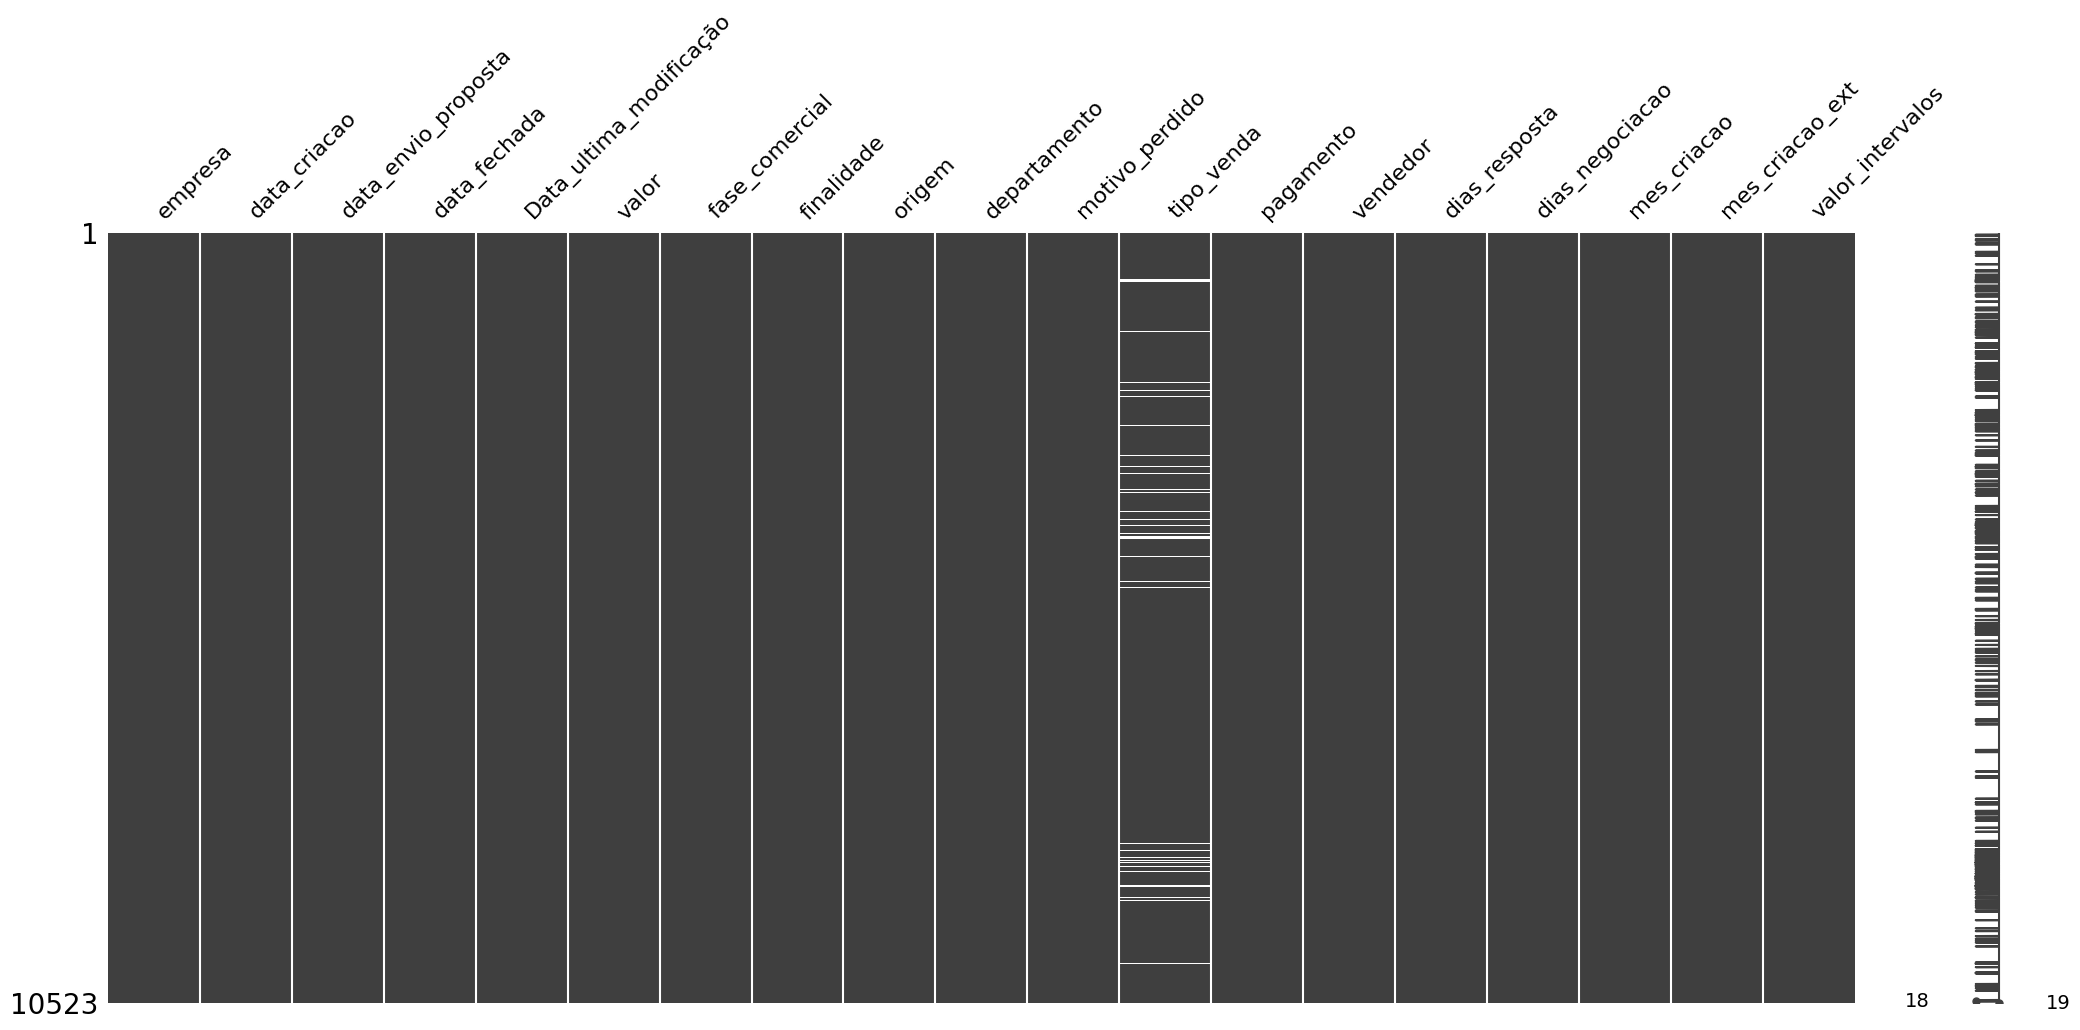

In [28]:
# Trocando os dados nulos da coluna 'Pagamento' para 'Faturado'
atributos['pagamento'].fillna('Faturado', inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

Fazemos essa troca por ser o tipo de venda padrão na empresa

<Axes: >

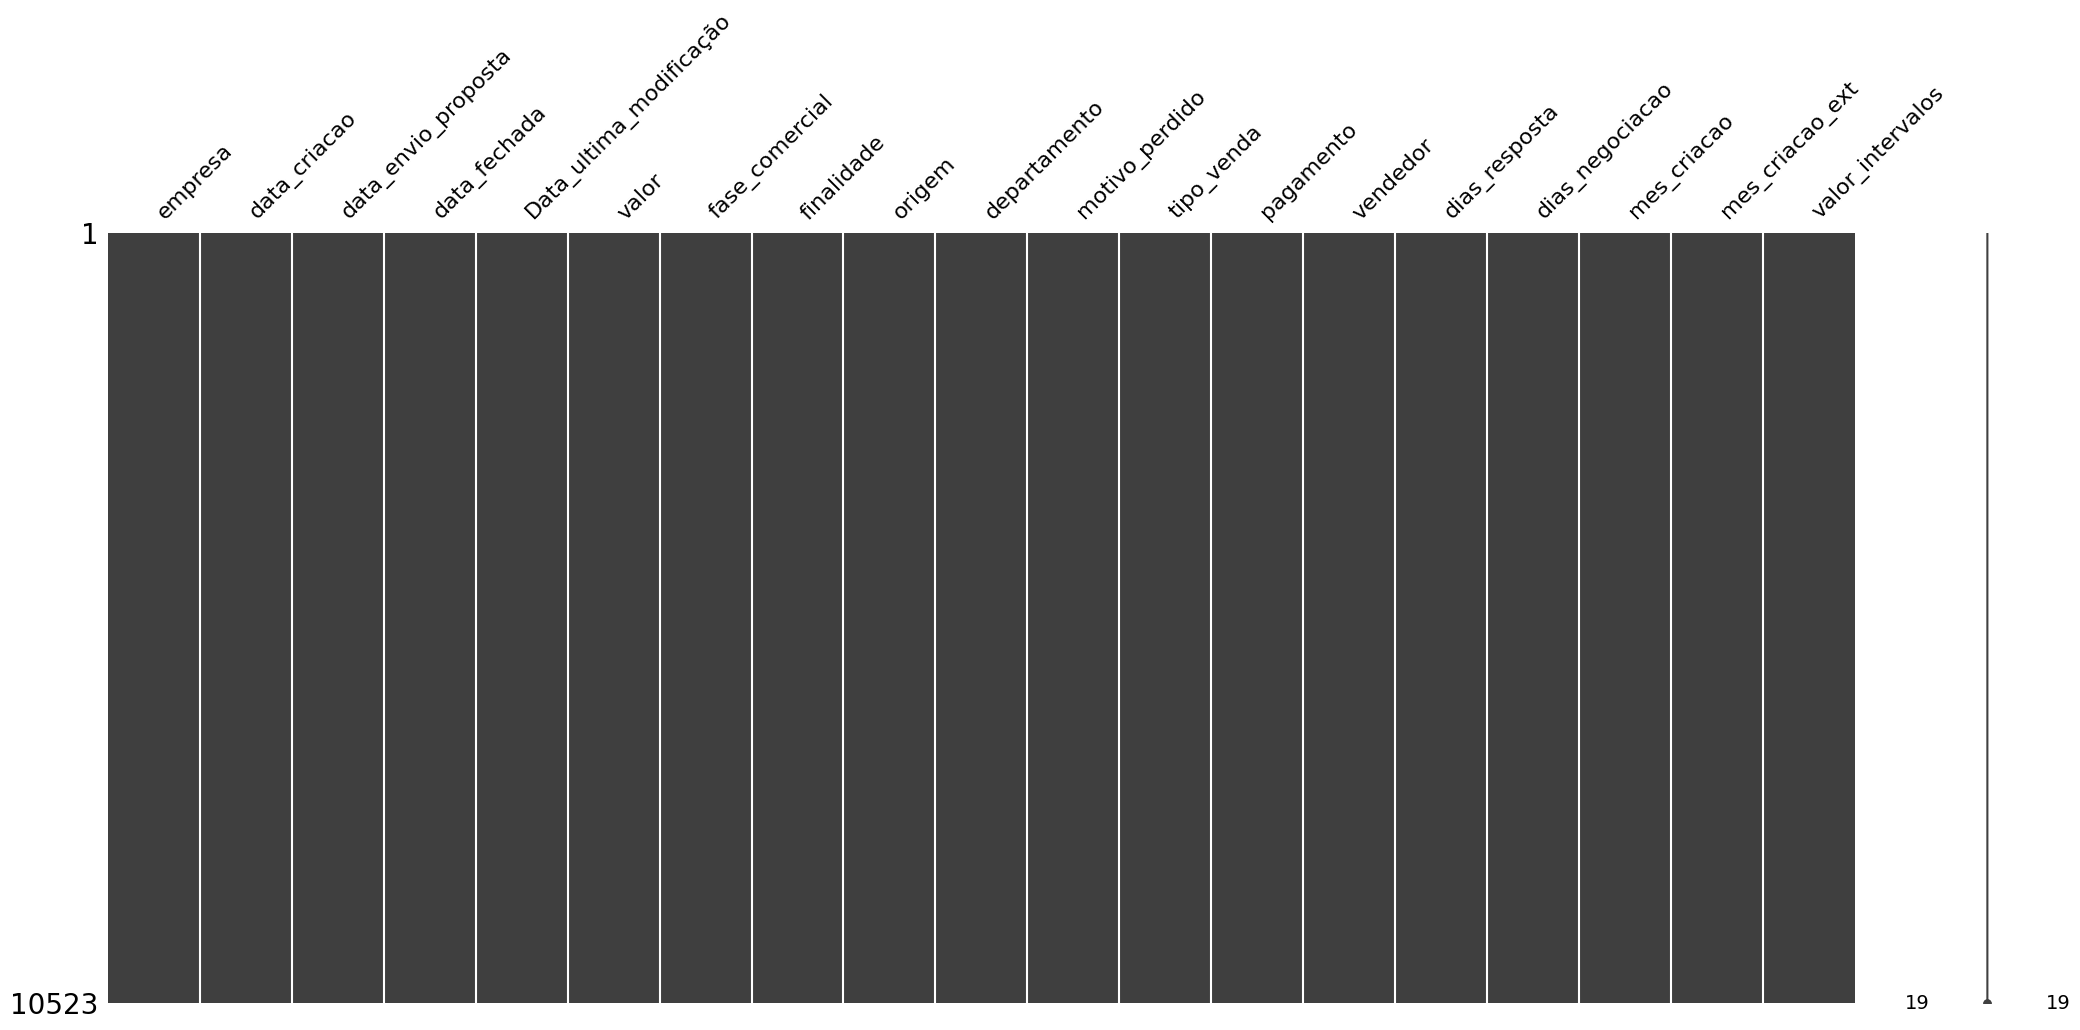

In [29]:
# Trocando todos os nomes do tipo de venda nulos por 'Cotação'

atributos['tipo_venda'].fillna('Cotação', inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

In [30]:
# seleciona a coluna desejada
coluna_dias_resposta = atributos['dias_resposta']

# conta a quantidade de ocorrências de cada categoria
categorias_dias_resposta = coluna_dias_resposta.value_counts()

# exibe as categorias encontradas
print(categorias_dias_resposta)

 0      4945
 1      1046
 2       354
 31      320
 3       298
        ... 
 68        1
-109       1
 198       1
-151       1
 155       1
Name: dias_resposta, Length: 362, dtype: int64


In [31]:
# Guardando o novo dataset para testes futuros
dataset_new = atributos

# Análise de Dados Nova

Com os dados tratados de maneira adequada, conseguimos tirar melhores conclusões das análises. 

O gráfico abaixo demonstra a frequência de quando as negociações começam, mostrando uma maior concentração no início do ano e no final, tendo o meio do ano mais fraco em termos de negociações iniciadas.

Quando comparamos com o valor das negociações em cada mês, percebemos que em alguns meses no meio do ano, mesmo a frequêcia sendo menor, os preços negociados passam os do início e final do ano.

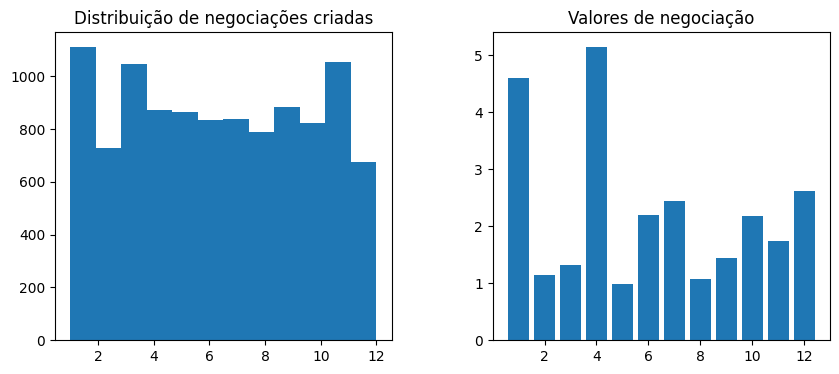

In [32]:
# Cria uma figura com dois gráficos, um ao lado do outro
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plota o primeiro gráfico no primeiro eixo
axs[0].hist(dataset_new['mes_criacao'], bins=12)
axs[0].set_title('Distribuição de negociações criadas')

# Plota o segundo gráfico no segundo eixo
axs[1].bar(dataset_new['mes_criacao'], dataset_new['valor']/1e6)
axs[1].set_title('Valores de negociação')

# Ajusta o espaçamento entre os gráficos
plt.subplots_adjust(wspace=0.3)

# Mostra o gráfico
plt.show()

A distribuição abaixo demonstra os valores mais presente nas negociações da empresa, podemos notar 3 grandes pontos. Negociações de R$1.000,00, R$15.000,00 e de R$50.000,00, demonstrando uma variação assimétrica.

<Axes: >

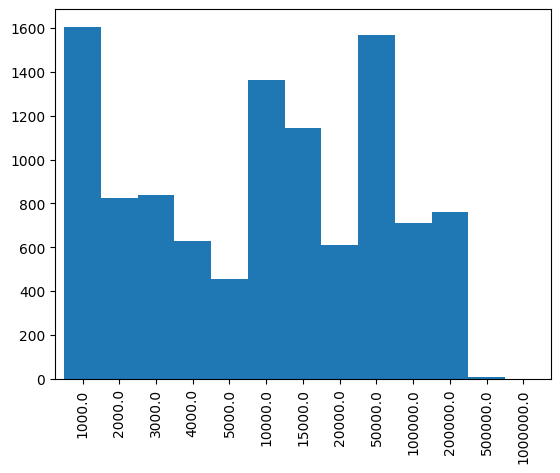

In [33]:
value_counts_new = dataset_new['valor_intervalos'].value_counts().sort_index()
# value_counts.plot(kind='bar')
value_counts_new.plot(kind='bar', stacked=True, width=1)

No boxplot abaixo podemos notar um grande número de outliers, mostrando que os dias em negociações são muito longos, passando as vezes de 1 ano. Outros valores estranhos são notados, como dias negativos, não tem como isso acontecer, dessa forma precisaremos tratar os dados

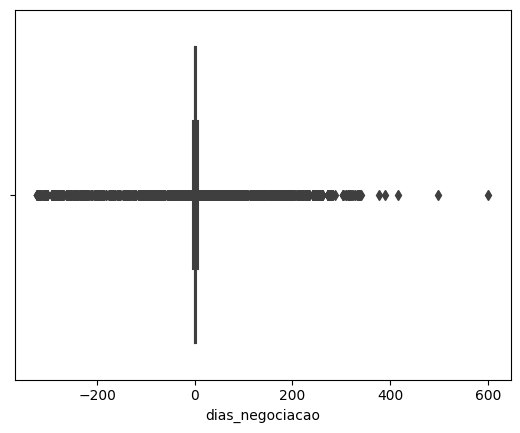

In [34]:
sns.boxplot(x=dataset_new['dias_negociacao']);

Neste caso, trocaremos os valores negativos por 0, assumindo que os vendedores terminaram a negociação no mesmo dia e que cadastraram errado no sistema. Outra transformação a fazer é colocar todos os valores acima de 365 dias para 365, pois não é plausível uma negociação ter mais de 1 ano.

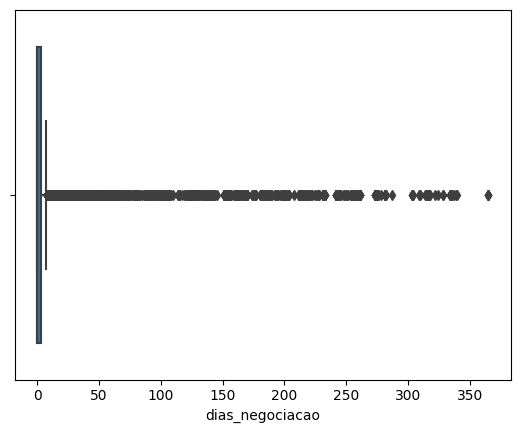

In [35]:
# trocar valores que não façam sentido

# Trocando valores negativos por 0
dataset_new['dias_negociacao'] = dataset_new['dias_negociacao'].apply(lambda x: 0 if x < 0 else x)

# Trocando valores maiores que 365 por 365
dataset_new['dias_negociacao'] = dataset_new['dias_negociacao'].apply(lambda x: 365 if x > 365 else x)

sns.boxplot(x=dataset_new['dias_negociacao']);

# fazer um boxplot com um intervalo definido, como ex de 0 a 10

Desta forma, vamos analisar somente os dados com 30 dias ou menos, considera o tempo máximo padrão para os vendedores terminarem uma negociação, e mesmo assim os dados estão com bastante outliners.

<Axes: xlabel='dias_negociacao'>

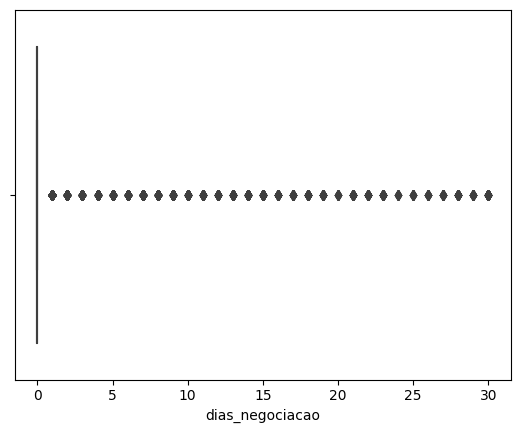

In [36]:
# Filtra o DataFrame para manter apenas os valores iguais ou menores a 30
filtro_30 = dataset_new[dataset_new['dias_negociacao'] <= 30]

# Faz o boxplot com os valores filtrados
sns.boxplot(x=filtro_30['dias_negociacao'])

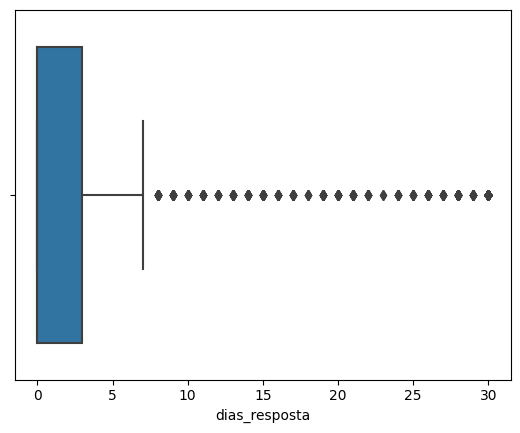

In [37]:
# trocar valores absurdos por que façam sentido

# Trocando valores negativos por 0
dataset_new['dias_resposta'] = dataset_new['dias_resposta'].apply(lambda x: 0 if x < 0 else x)

# Trocando valores maiores que 30 por 30
dataset_new['dias_resposta'] = dataset_new['dias_resposta'].apply(lambda x: 30 if x > 30 else x)

sns.boxplot(x=dataset_new['dias_resposta']);

A matriz de correlação não demonstra nenhuma correlação entre as variáveis, ou seja, a negociação demorar muito ou pouco para ser fechada ou o vendedor demorar a responder o cliente não influencia no valor que ele irá comprar.

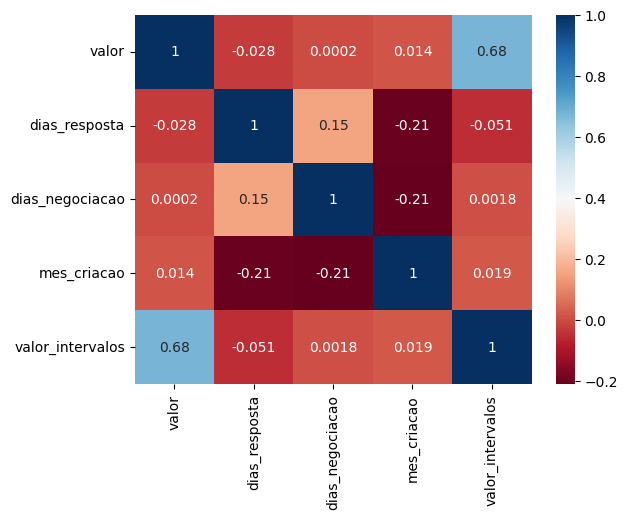

In [38]:
# Matriz de Correlação com Matplotlib Seaborn
sns.heatmap(dataset_new.corr(), annot=True, cmap='RdBu');

#não fazer a coluna extra de fase comercial

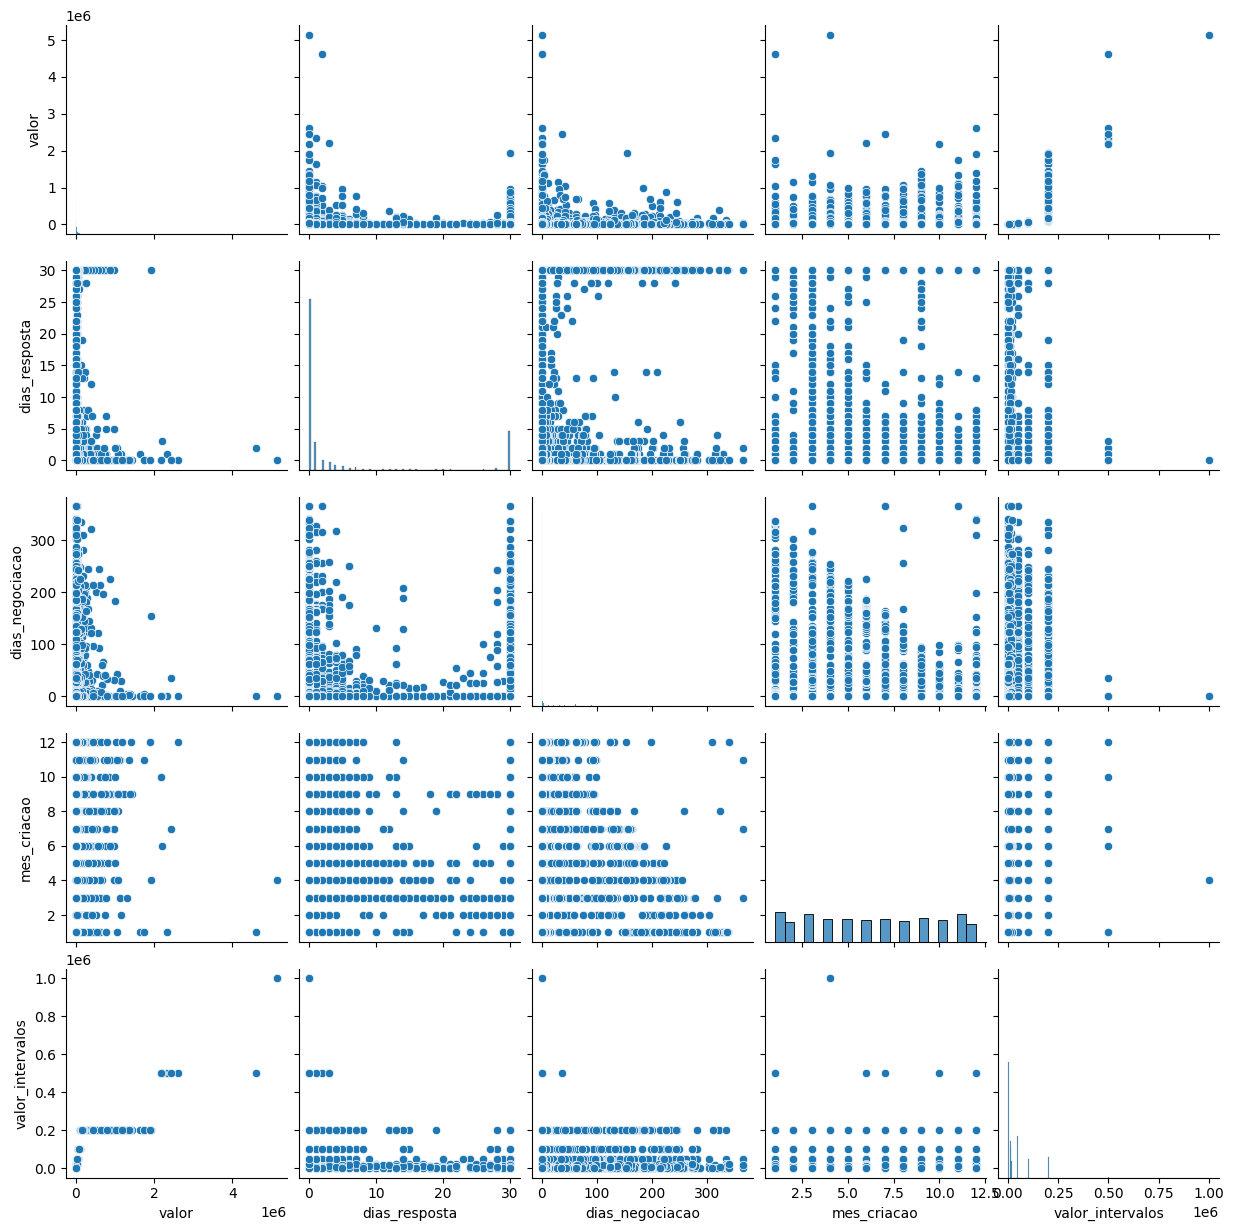

In [39]:
# Scatter Plot com Seaborn - Variação 1

sns.pairplot(dataset_new)

Com o Scatter Plot conseguimos perceber que a concentração de negociações fechada e ganha fica até 10 dias para responder o cliente, assim fica evidente de que quanto mais rápido responder, mais será a chance do cliente fechar negócio.

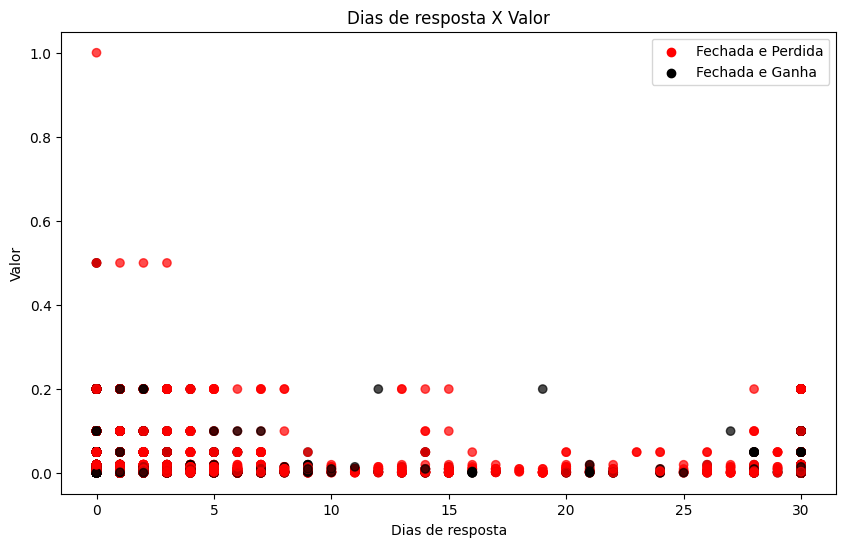

In [40]:
# Define as cores de acordo com a fase comercial
cores = {'Fechada e Perdida': 'red', 'Fechada e Ganha': 'black'}

# Cria a figura e os eixos
fig, ax = plt.subplots(figsize=(10, 6))

# Cria o scatter plot
ax.scatter(dataset_new['dias_resposta'], dataset_new['valor_intervalos']/1e6, 
           c=dataset_new['fase_comercial'].apply(lambda x: cores[x]), alpha=0.7)

# Adiciona os rótulos dos eixos e o título do gráfico
ax.set_xlabel('Dias de resposta')
ax.set_ylabel('Valor')
ax.set_title('Dias de resposta X Valor')

# Adiciona a legenda
for fase, cor in cores.items():
    ax.scatter([], [], c=cor, label=fase)
ax.legend()

# Exibe o gráfico
plt.show()


Nos dois gráfico de pizza, podemos ver que o volume de negociações é bem meior para uso próprio dos clientes, a empresa possui poucas negociações para empresas de revenda. Quando mostramos o gráfico de orçamentos fechados, a categoria revenda tem um aumento, mas continua bem menor em relação a consumo próprio.

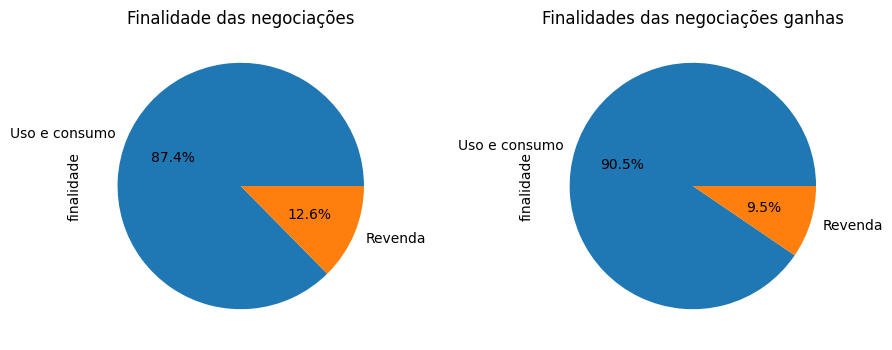

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Cria o primeiro gráfico demonstrando o volume de negociações
# que são para uso próprio do cliente ou revenda
contar_finalidade = dataset_new['finalidade'].value_counts()
contar_finalidade.plot(kind='pie', autopct='%1.1f%%', ax=axs[0])
axs[0].set_title('Finalidade das negociações')

# Cria o segundo gráfico demonstrando o volume de negociações
# que são para uso próprio do cliente ou revenda que foram ganhas
filtro = dataset_new['fase_comercial'] == 'Fechada e Ganha'
contagem = dataset_new[filtro]['finalidade'].value_counts()
contagem.plot(kind='pie', autopct='%1.1f%%', ax=axs[1])
axs[1].set_title('Finalidades das negociações ganhas')

# Ajusta o espaçamento entre os gráficos
plt.subplots_adjust(wspace=0.4)

# Mostra a figura
plt.show()

Quando mostramos o mesmo estilo de gráfico de pizza, porém com valores, podemos perceber que mesmo com uma porcentagem pequena de número de negociações em revenda, mostrada nos gráficos anteriores, o valor total delas é muito grande, demonstrando que o ticket médio dos orçamentos dessa categoria é bem alto, pois os clientes compra em grandes volumes pare terem um bom desconto e poderem revender os itens.

A presença de revenda sobe ainda mais quando analisamos apenas as negociações que foram fechadas e ganhas, mostrando que há um volume muito maior em termos de negociações únicas para uso e consumo, porém revenda tem uma melhor performace para vender.

Text(0.5, 1.0, 'Valor por Finalidade ganhas')

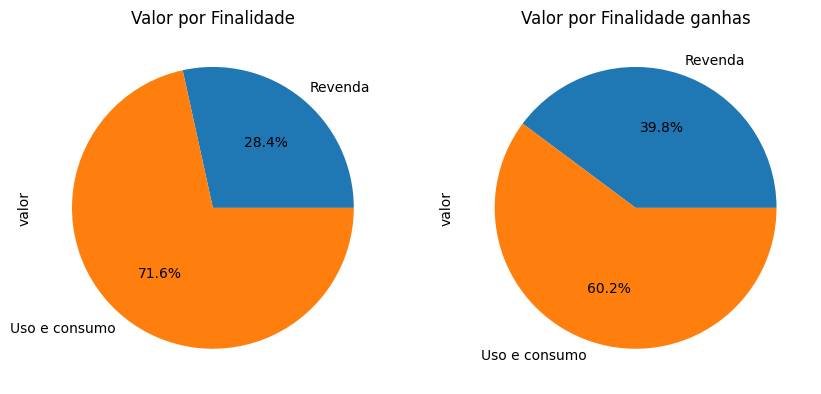

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Agrupa os valores pela coluna 'finalidade' e soma os valores da coluna 'valor'
contagem1 = dataset_new.groupby('finalidade')['valor'].sum()

# Plota o primeiro gráfico de pizza com as porcentagens
contagem1.plot(kind='pie', autopct='%1.1f%%', ax=axs[0])
axs[0].set_title('Valor por Finalidade')

# Plota o segundo gráfico de pizza com as porcentagens, filtrando somente
# pela fase comercial fechada e ganha
filtro1 = dataset_new['fase_comercial'] == 'Fechada e Ganha'
contagem = dataset_new[filtro1].groupby('finalidade')['valor'].sum()
contagem.plot(kind='pie', autopct='%1.1f%%', ax=axs[1])
axs[1].set_title('Valor por Finalidade ganhas')

No gráfico de barras, ordenamos do maior pro menor, os departamentos que estão mais presentes em vendas efetivas na empresa, tendo muito a presença dos eletrônicos em geral, sendo os dois maiores, celulares e tablets.

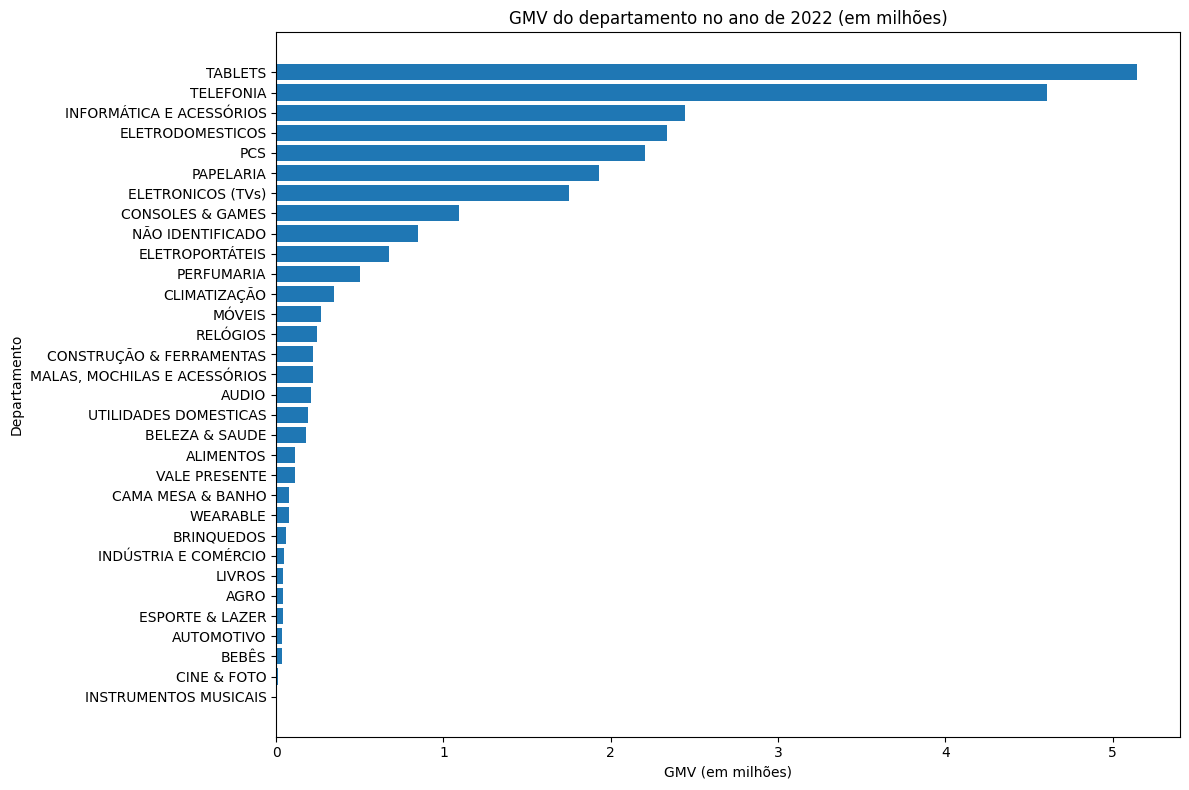

In [43]:
# Cria uma nova coluna com os valores negativos da coluna 'valor'
dataset_new['valor_negativo'] = -dataset_new['valor']

# Ordena o dataframe pela coluna 'valor_negativo' em ordem decrescente
dataset_new_dep = dataset_new.sort_values('valor_negativo', ascending=True)

# Prepara a figura (fig) e a área do gráfico (ax) com largura 12 e altura 8 (em polegadas)
fig, ax = plt.subplots(figsize=(12, 8))

# Plota o gráfico de barras
b1 = ax.barh(y=dataset_new_dep['departamento'], width=dataset_new_dep['valor']/1e6)

# Acrescenta um título ao gráfico
plt.title('GMV do departamento no ano de 2022 (em milhões)')

# Define os rótulos dos eixos
plt.xlabel('GMV (em milhões)') 
plt.ylabel('Departamento')

# Inverte o eixo y
ax.invert_yaxis()

# Ajusta as margens do gráfico (para eliminar margens desnecessárias)
plt.tight_layout() 

# Exibe o gráfico
plt.show()


Este gráfico demonstra a evolução no ano das negociações perdidas e ganhas. Percebemos como o final e o início do ano, os cliente compram e demandam mais orçamentos, mostrando a força das promoções de final de ano, bem como a black friday.

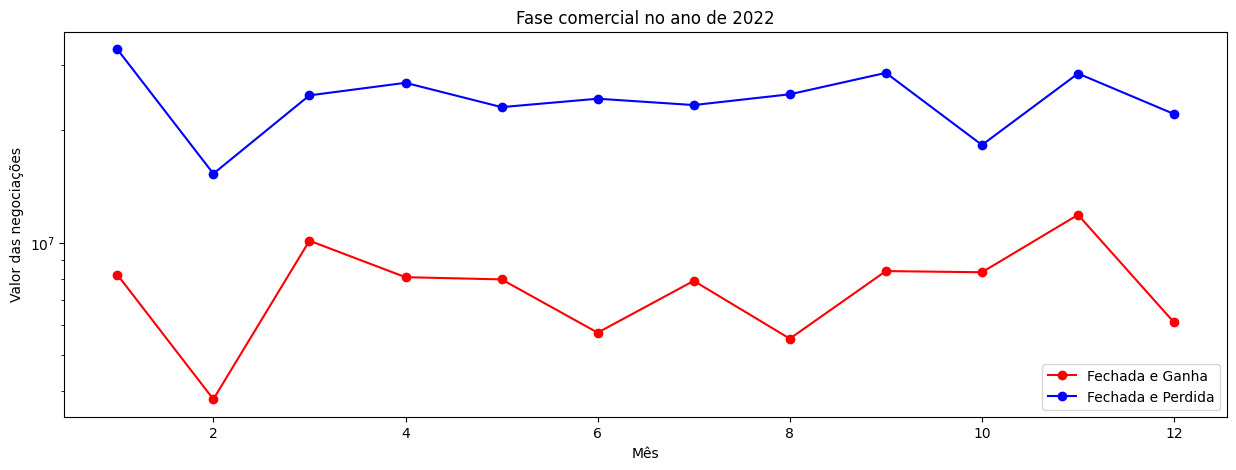

In [44]:
# cria uma tabela dinâmica com os valores de 'valor' agrupados por 'mes_criacao' e 'fase_comercial'
pivot_table = pd.pivot_table(dataset_new, values='valor', index='mes_criacao', columns='fase_comercial', aggfunc='sum')

# prepara a figura e a área do gráfico
fig, ax = plt.subplots(figsize=(15,5))

# plota as linhas com os valores de 'Fechada e Ganha' e 'Fechada e Perdida'
ax.plot(pivot_table.index, pivot_table['Fechada e Ganha'], color='red', marker='o', label='Fechada e Ganha')
ax.plot(pivot_table.index, pivot_table['Fechada e Perdida'], color='blue', marker='o', label='Fechada e Perdida')

# configura o título e os rótulos dos eixos
ax.set_title('Fase comercial no ano de 2022')
ax.set_xlabel('Mês')
ax.set_ylabel('Valor das negociações')

# adiciona escala logarítmica no eixo Y
ax.set_yscale('log')

# acrescenta legenda
ax.legend()

# salva o gráfico em diferentes formatos
plt.savefig("linha-simples.pdf")
plt.savefig("linha-simples.svg")
plt.savefig("linha-simples.png", dpi=150, format="png")

# exibe o gráfico
plt.show()

In [46]:
# separa os conjuntos de treino e teste
#train = dataset_new[(dataset['mes_criacao'] == 9) | (dataset_new['mes_criacao'] == 10)]
#test = dataset_new[(dataset['mes_criacao'] == 11) | (dataset_new['mes_criacao'] == 12)]

# separa as variáveis de entrada e saída
#X_train = train.drop(['target'], axis=1)
#y_train = train['target']
#X_test = test.drop(['target'], axis=1)
#y_test = test['target']